In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore warnings like "this function is old and will be replaced by..."

# Download it from moodle and change the names (preferably to a
# disk where you change the name once and the computer remembers everything)
df1 = pd.read_csv('/content/drive/MyDrive/df_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/df_2.csv')
df4 = pd.read_csv('/content/drive/MyDrive/df_4.csv')


# Merging DataFrames
df = pd.concat([df1, df2, df4], axis=0, ignore_index=True)
df.shape

(4644, 18)

We created a unified, comprehensive dataset by merging the three separate datasets provided for this project. This combined dataset serves as the foundation for building and training our Machine Learning models to predict Vegetation Type. It’s important to note that the merged dataset is imbalanced, with uneven class distribution across Vegetation Types 1, 2, and 3. By leveraging the full scope of the data in this way, we increase the potential for insightful analysis and more accurate predictions

In [ ]:
df.head()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type
0,41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,Type_1
1,52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,Type_1
2,53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,Type_1
3,56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,Type_1
4,68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,Type_1


#EDA

In our EDA, we categorized the dataset's features into categorical, discrete, and continuous based on their data types. Then, we analyzed each column for missing values and counted the unique ones, so we could identify potential issues like missing data and gain insights into the variability of each feature

In [ ]:
sum_str, sum_int, sum_float = 0, 0, 0
for column in df.columns:
    if df[column].dtype == 'object':
        sum_str+=1
    elif df[column].dtype == 'int64':
        sum_int+=1
    elif df[column].dtype == 'float64':
        sum_float+=1

print(f'The set contains {sum_str} categorical, {sum_int} descrete and {sum_float} continuos features')

The set contains 3 categorical, 11 descrete and 4 continuos features


In [ ]:
# Check data types and missing values
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
Id,int64,0,4644
Altitude,int64,0,1219
Slope_Orientation,int64,0,360
Slope,int64,0,43
Horizontal_Distance_To_Water,int64,0,290
Vertical_Distance_To_Water,int64,0,331
Horizontal_Distance_To_Roadways,int64,0,2270
Shadow_Index_9h,int64,0,146
Shadow_Index_12h,int64,0,108
Shadow_Index_15h,int64,0,230


In [ ]:
df.set_index('Id')

,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type
Id,,,,,,,,,,,,,,,,,
41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,Type_1
52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,Type_1
53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,Type_1
56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,Type_1
68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,Type_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12429,2012,155,27,30,3,240,239,230,101,277,46.04,317.49,375.09,6.29,Type_6,Area_4,Type_4
12802,2220,144,32,67,37,1209,245,214,70,1082,33.48,356.58,640.40,48.84,Type_3,Area_4,Type_4
3703,2176,121,29,108,63,1020,254,202,54,382,49.05,283.17,669.14,57.23,Type_3,Area_4,Type_4


We will use the "id" column as the index for our dataset instead of a regular data field. This decision is based on the fact that "id" values are unique and not correlated with other data, making them effective identifiers. By designating the "id" column as the index, we can streamline data access and improve performance in operations like lookups and sorting. This approach simplifies our data structure while taking advantage of the unique properties of the "id" values.


## Descriptive statistics

In [ ]:
df.describe(exclude='object').T # for all numerical (quantitive)

,count,mean,std,min,25%,50%,75%,max
Id,4644.0,7060.527562,4637.847774,3.00,2862.7500,7322.500,10825.5000,14930.00
Altitude,4644.0,2854.089578,391.476682,1989.00,2606.0000,2980.000,3157.0000,3675.00
Slope_Orientation,4644.0,151.451335,108.021944,0.00,62.0000,122.000,243.2500,359.00
Slope,4644.0,14.470930,7.904408,1.00,9.0000,13.000,19.0000,45.00
Horizontal_Distance_To_Water,4644.0,237.774332,214.551823,0.00,60.0000,192.000,360.0000,1343.00
Vertical_Distance_To_Water,4644.0,43.010336,57.498110,-146.00,2.0000,23.000,65.0000,547.00
Horizontal_Distance_To_Roadways,4644.0,2149.656546,1528.148751,67.00,976.0000,1622.000,3105.5000,6836.00
Shadow_Index_9h,4644.0,216.226098,25.925898,83.00,202.0000,221.000,235.0000,254.00
Shadow_Index_12h,4644.0,222.440353,19.119474,115.00,212.0000,225.000,236.0000,254.00
Shadow_Index_15h,4644.0,136.177864,41.659174,0.00,112.0000,138.000,165.0000,248.00


From the descriptive statistics we can draw several key insights about the numerical variables in the dataset:
- Many features have a wide range of values. For example "Altitude" spans from 1989 to 3675, and "Horizontal_Distance_To_Roadways" ranges from 67 to 6837. This indicates that these features cover a broad spectrum of scenarios or measurements
- Some variables show a high standard deviation compared to their mean, indicating that the data is quite spread out. This situation is visible in "Horizontal_Distance_To_Roadways", the mean of 2149 and std of 1528 suggests highly dispersed data points
- In "Vertical_Distance_To_Water" we observe negative minimum value -146, which could represent negative errors or unusual cases. These may need further investigation as potential outliers
- Large differences between quartiles suggests a skewed or stretched distribution that may require transformations (e.g., logarithmic) to normalize the data for modeling. Like in "Horizontal_Distance_To_Fire_Points", the value in the 25th percentile is 853 and 2375 in the 75th
- Variables like Slope and Shadow_Index_15h have relatively small standard deviations compared to their means, indicating that these features are less dispersed and more concentrated around their average values. This may mean they have less impact on the overall variability of the dataset.



In [ ]:
df.describe(exclude='number').T # for all categorical (qualitative)

,count,unique,top,freq
Soil_Type,4644,37,Type_29,768
Wilderness_Area,4644,4,Area_1,1830
Vegetation_Type,4644,3,Type_1,2160


The analysis revealed a diverse landscape characterized by 37 different soil types, 4 distinct wilderness areas, and 3 main vegetation types. Among these, "Type_29" soil was the most prevalent, "Area_1" was the most widely distributed wilderness area, and "Type_1" vegetation was the most common. The frequencies of occurrence of these categories will be presented in detail on charts in a subsequent section.

In [ ]:
df['Vegetation_Type'].value_counts()

,count
Vegetation_Type,
Type_1,2160
Type_2,1404
Type_4,1080


In [ ]:
df2 = df

We created df2 as a copy of the original dataframe to preserve the categorical features in their original form. This is important because the categorical variables will later be encoded into numerical values in df, which would prevent us from analyzing correlations between the original categorical features. By keeping df2 intact, we retain the ability to reference the unencoded data when needed

In [ ]:
target_count = 1050  # t_count is hyperparameter
df_ready = df.groupby('Vegetation_Type').apply(
    lambda x: x.sample(n=min(len(x), target_count), random_state=42)
).reset_index(drop=True)

new_class_counts = df_ready['Vegetation_Type'].value_counts()
new_class_counts


,count
Vegetation_Type,
Type_1,1050
Type_2,1050
Type_4,1050


Having obtained the results for both the balanced and unbalanced datasets, we will now proceed with a comparative analysis, focusing on the impact of data imbalance on model performance metrics such as precision, recall, and F1-score. This analysis will help us determine the best approach for handling imbalanced datasets in similar scenarios

## Univariate Analysis (Distribution of individual features)


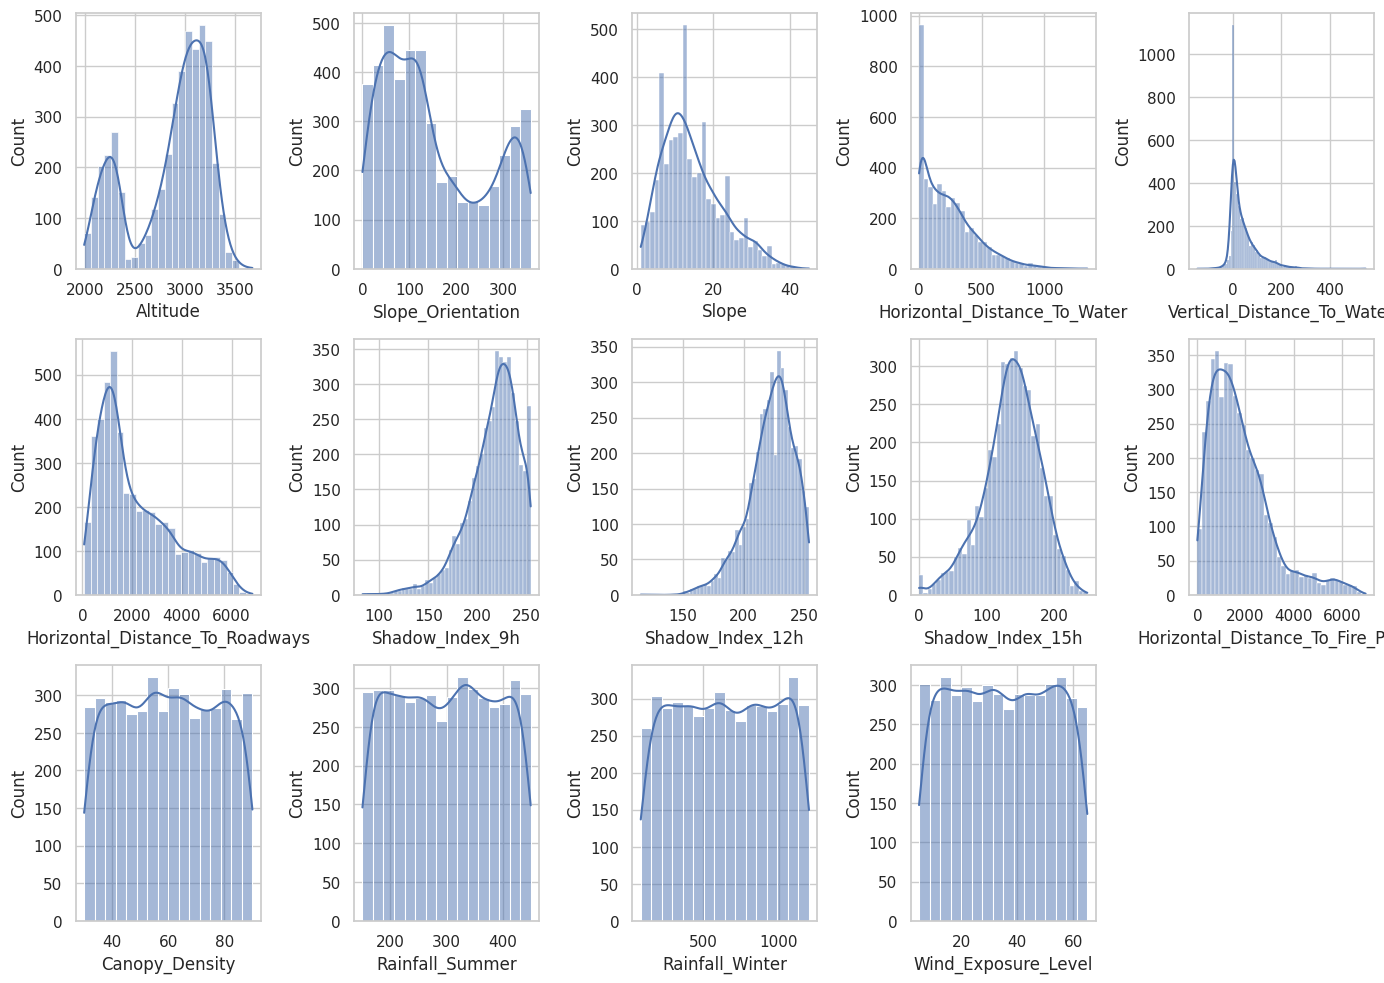

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualization style (grid on the plots)
sns.set(style="whitegrid")

# Selecting numerical columns without 'Id', which is the index and should not be correlated with anything
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns='Id').columns

# Function to calculate Freedman-Diaconis bins
def freedman_diaconis_bins(data):
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25  # Interquartile range
    bin_width = 2 * iqr * len(data) ** (-1/3)  # Freedman-Diaconis rule
    bins = int((data.max() - data.min()) / bin_width)
    return max(1, bins)  # Ensure at least one bin

# Subplots creation
fig, axes = plt.subplots(3, 5, figsize=(14, 10))  # Update dimensions based on the number of variables

# Positioning the subplots
for i, col in enumerate(numerical_columns):
    data = df[col].dropna()  # Drop NaN values to avoid errors
    bins = freedman_diaconis_bins(data)  # Calculate bins using the Freedman-Diaconis rule
    sns.histplot(x=data, kde=True, bins=bins, ax=axes[i // 5, i % 5])  # Pass series directly to x

# Deleting unused plots
for j in range(i + 1, 3 * 5):
    fig.delaxes(axes[j // 5, j % 5])

plt.tight_layout()
plt.show()


The "freedman_diaconis_bins" function is responsible for determining an appropriate number of bins based on the data’s spread and size, helping to create a histogram that reflects the data’s distribution effectively without overfitting or underfitting.

Most variables exhibit positive skew, meaning that most observations are clustered at lower values, and a small portion of observations take on very high values. For instance, variables like "Horizontal_Distance_To_Water" have a clearly visible long tail on the right side.

In contrast, some variables, such as "Slope_Orientation" and "Canopy_Density," appear to have a more symmetric distribution, although they may still exhibit some asymmetry.

Furthermore, kurtosis varies across different variables. Some variables have more peaked distributions, like "Slope," while others are flatter, like "Rainfall_Summer."

Overall, the data exhibits heterogeneity, with different variables having distinct distributions. Additionally, many variables have a dominance of lower values, suggesting that most observations fall within the lower range. Finally, the presence of long tails in some distributions indicates the existence of outliers, which can significantly influence data analysis

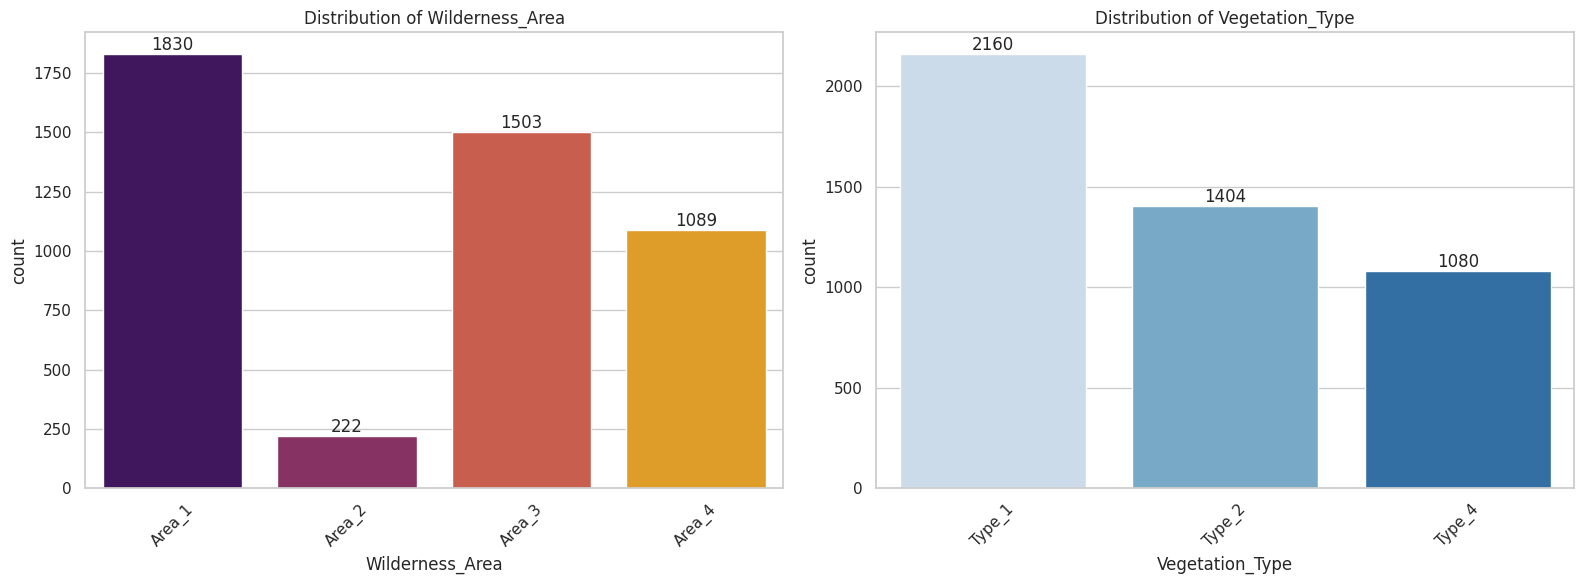

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the visualizations
sns.set(style="whitegrid")

# Select categorical variables (excluding the index "Id" and numerical variables)
categorical_columns = df.select_dtypes(include=['object']).drop(columns='Soil_Type').columns

# Define custom color palettes for each categorical column
color_palettes = ['inferno', 'Blues']  # Add more palettes if needed

# Create subplots for the bar plots (1 row for the number of categorical columns)
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(16, 6))

# Define a manual order for specific columns if needed
manual_order = {
    'Wilderness_Area': ['Area_1', 'Area_2', 'Area_3', 'Area_4'],  # Custom order for Wilderness_Area
    # Add more manual orders for other columns if needed
}

# Iterate through categorical columns and draw bar plots
for i, col in enumerate(categorical_columns):
    # Check if manual order is defined for the column, otherwise use default
    order = manual_order.get(col, df[col].unique())  # Use manual order if available

    # Create a count plot for each categorical variable with the specified order
    sns.countplot(data=df, x=col, ax=axes[i],
                   palette=color_palettes[i % len(color_palettes)],
                   order=order)  # Use manual order or default order

    # Set the title for each subplot
    axes[i].set_title(f"Distribution of {col}")

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    # Add text annotations to show counts on top of bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom')  # Position the text above the bar

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The highest number of observations is found in the wilderness area "Area_1" and the vegetation type "Type_1." This suggests that the majority of the data in the dataset pertains to these specific categories. We observe a clear difference in the representation of individual categories. Some categories are significantly more represented than others, which may have important implications for further data analysis.


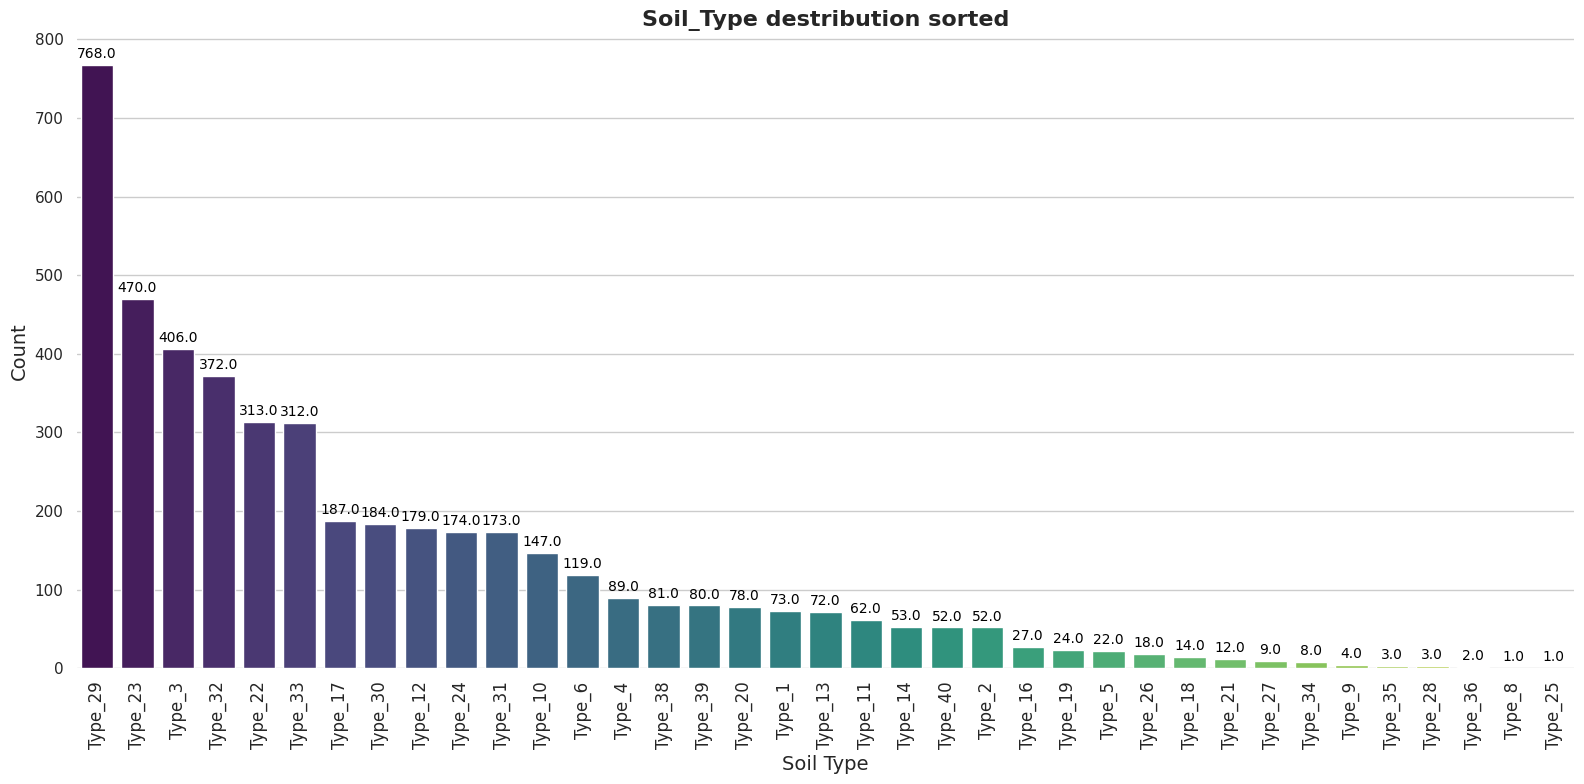

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 8))

ax = sns.countplot(data=df, x='Soil_Type', order=df['Soil_Type'].value_counts().index,
                   palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=90, fontsize=12)

plt.title('Soil_Type destribution sorted', fontsize=16, weight='bold')
plt.xlabel('Soil Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


The bar chart illustrates the frequency distribution of different soil types. It shows that the vast majority of samples come from soil type "Type_29", while the other types occur much less frequently

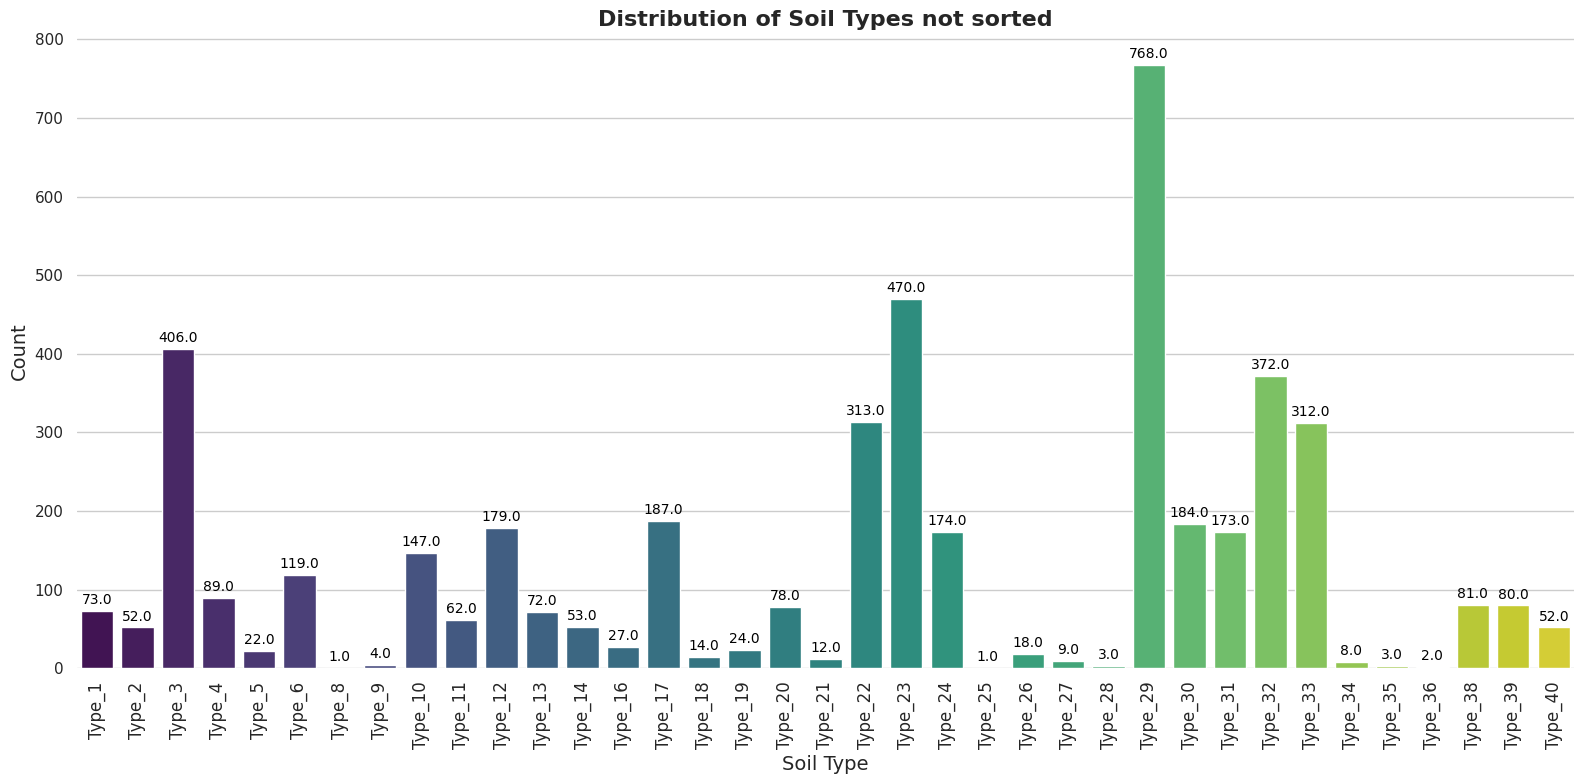

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots (you can change it to "whitegrid", "darkgrid", etc.)
sns.set(style="whitegrid", palette="muted")

# Define the ordered list of Soil Types
ordered_soil_types = [
    'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6',
    'Type_8', 'Type_9', 'Type_10', 'Type_11', 'Type_12', 'Type_13',
    'Type_14', 'Type_16', 'Type_17', 'Type_18', 'Type_19', 'Type_20',
    'Type_21', 'Type_22', 'Type_23', 'Type_24', 'Type_25', 'Type_26',
    'Type_27', 'Type_28', 'Type_29', 'Type_30', 'Type_31', 'Type_32',
    'Type_33', 'Type_34', 'Type_35', 'Type_36', 'Type_38', 'Type_39',
    'Type_40'
]

# Create a figure for the bar plot
plt.figure(figsize=(16, 8))

# Create a count plot for the 'Soil_Type' variable, ordered by the specified list
ax = sns.countplot(data=df, x='Soil_Type', order=ordered_soil_types,
                   palette="viridis")  # You can change the palette to other options

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

# Set title and axis labels
plt.title('Distribution of Soil Types not sorted', fontsize=16, weight='bold')
plt.xlabel('Soil Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add horizontal grid for better readability
ax.yaxis.grid(True)
ax.xaxis.grid(False)  # Disable vertical grid for a cleaner look

# Remove the frame from the plot
sns.despine(left=True, bottom=True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Some soil types support little to no vegetation, while others are associated with significantly higher vegetation density. This uneven distribution complicates statistical inference, reducing the robustness and applicability of conclusions across diverse environmental contexts.

## Bivariate Analysis - Graphical and statistical represantation of variables distribution and correlation with the label (Vegetation_Type)


### Categorical vs categorical (target is categorical) - Count Plots

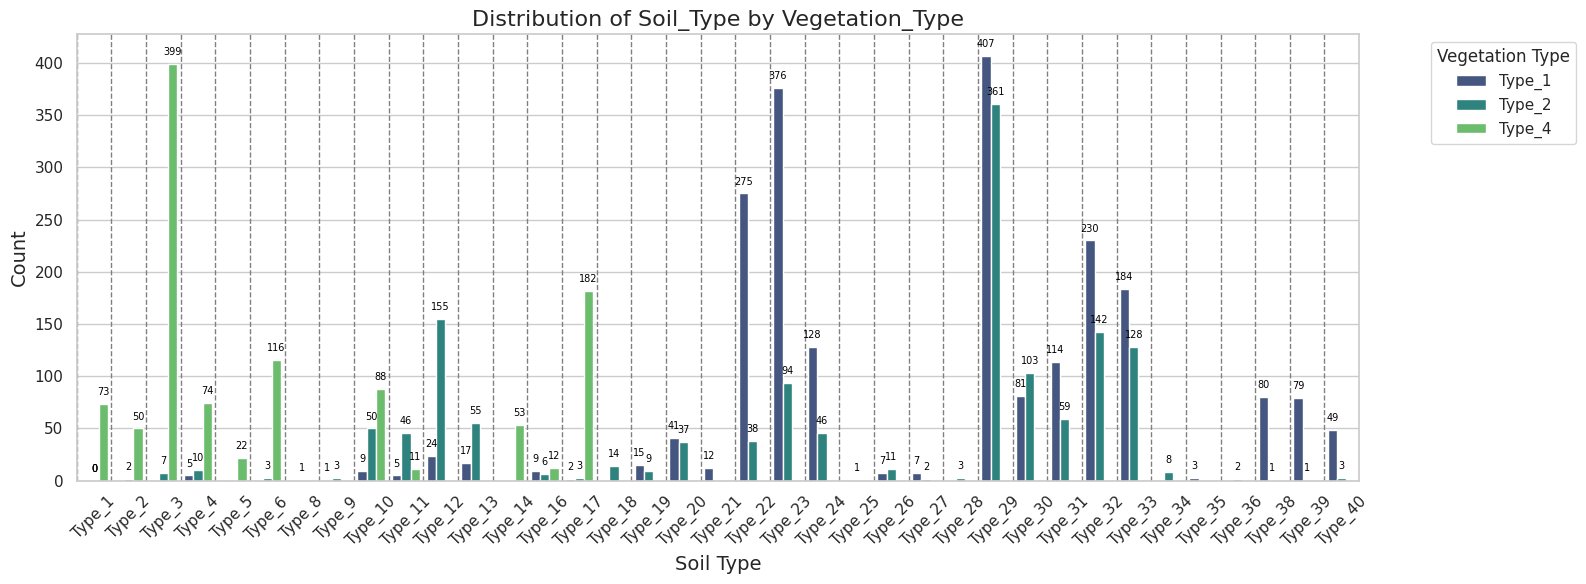

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(16, 6))

ordered_soil_types = [
    'Type_1', 'Type_2', 'Type_3', 'Type_4', 'Type_5', 'Type_6',
    'Type_8', 'Type_9', 'Type_10', 'Type_11', 'Type_12', 'Type_13',
    'Type_14', 'Type_16', 'Type_17', 'Type_18', 'Type_19', 'Type_20',
    'Type_21', 'Type_22', 'Type_23', 'Type_24', 'Type_25', 'Type_26',
    'Type_27', 'Type_28', 'Type_29', 'Type_30', 'Type_31', 'Type_32',
    'Type_33', 'Type_34', 'Type_35', 'Type_36', 'Type_38', 'Type_39',
    'Type_40'
]

# Create a count plot for 'Soil_Type' categorized by 'Vegetation_Type'
ax = sns.countplot(data=df, x='Soil_Type', hue='Vegetation_Type', palette='viridis', width=0.8, order=ordered_soil_types)



# Set the title and labels
plt.title('Distribution of Soil_Type by Vegetation_Type', fontsize=16)
plt.xlabel('Soil Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Add vertical lines for each category on the x-axis
for tick in ax.get_xticks():
    ax.axvline(x=tick - 0.5, color='gray', linestyle='--', linewidth=1)

# Add value annotations above each bar
for p in ax.patches:
    # Calculate the height of each bar
    height = p.get_height()
    # Add the text annotation above the bar
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the legend title and position
plt.legend(title='Vegetation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


- Vegetation Type 1 is highly adaptable and dominates across various soil types, suggesting it has a competitive advantage.
- Vegetation Types 1, 2, and 4 exhibit distinct distribution patterns, indicating niche specialization and potential competitive interactions.
- There is a clear relationship between soil type and vegetation type, suggesting that soil properties play a significant role in determining plant community composition.
- These findings highlight the complex interactions between soil and vegetation and have implications for understanding ecosystem function and management.


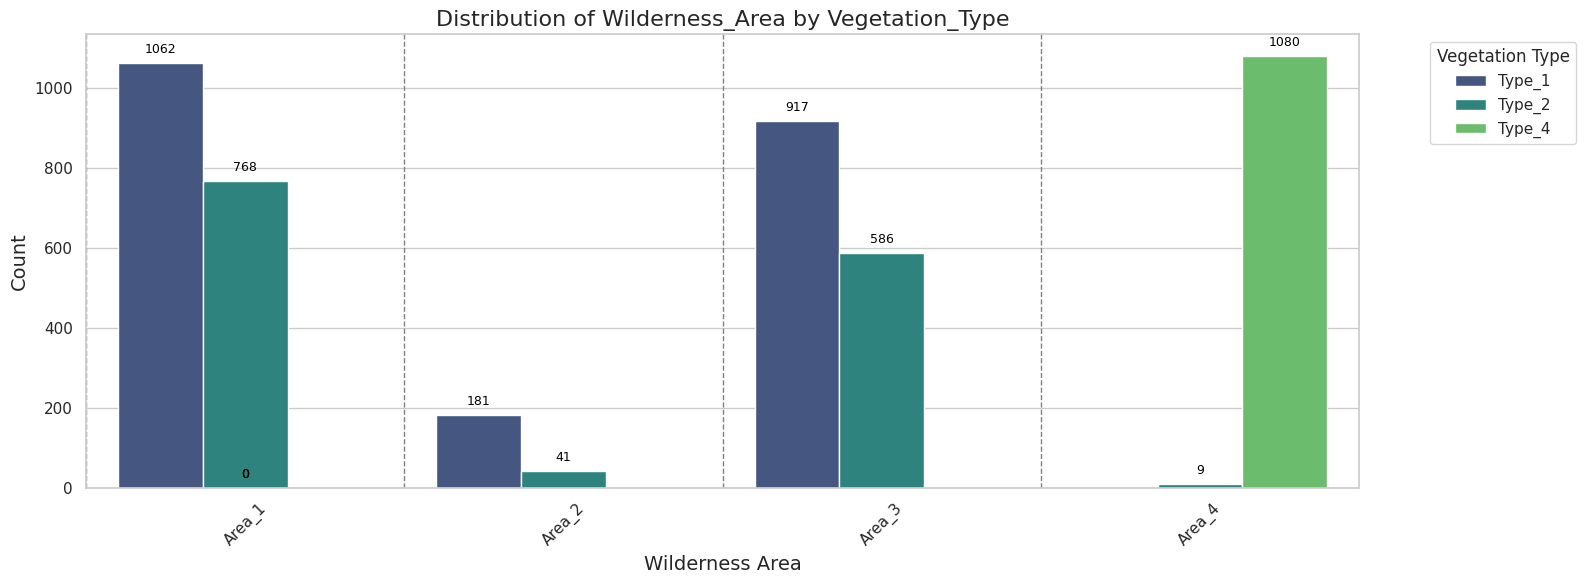

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with specified size
plt.figure(figsize=(16, 6))

# If you have a specific order for Wilderness_Area, define it here
ordered_wilderness_areas = sorted(df['Wilderness_Area'].unique())  # Sort Wilderness_Area categories alphabetically, or define custom order

# Create a count plot for 'Wilderness_Area' categorized by 'Vegetation_Type'
ax = sns.countplot(data=df, x='Wilderness_Area', hue='Vegetation_Type', palette='viridis', width=0.8, order=ordered_wilderness_areas)

# Set the title and labels
plt.title('Distribution of Wilderness_Area by Vegetation_Type', fontsize=16)
plt.xlabel('Wilderness Area', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Add vertical lines for each category on the x-axis
for tick in ax.get_xticks():
    ax.axvline(x=tick - 0.5, color='gray', linestyle='--', linewidth=1)

# Add value annotations above each bar
for p in ax.patches:
    # Calculate the height of each bar
    height = p.get_height()
    # Add the text annotation above the bar
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black',
                xytext=(0, 5), textcoords='offset points')

# Set the legend title and position
plt.legend(title='Vegetation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Continuos (numerical) vs categorical - grouped boxplots

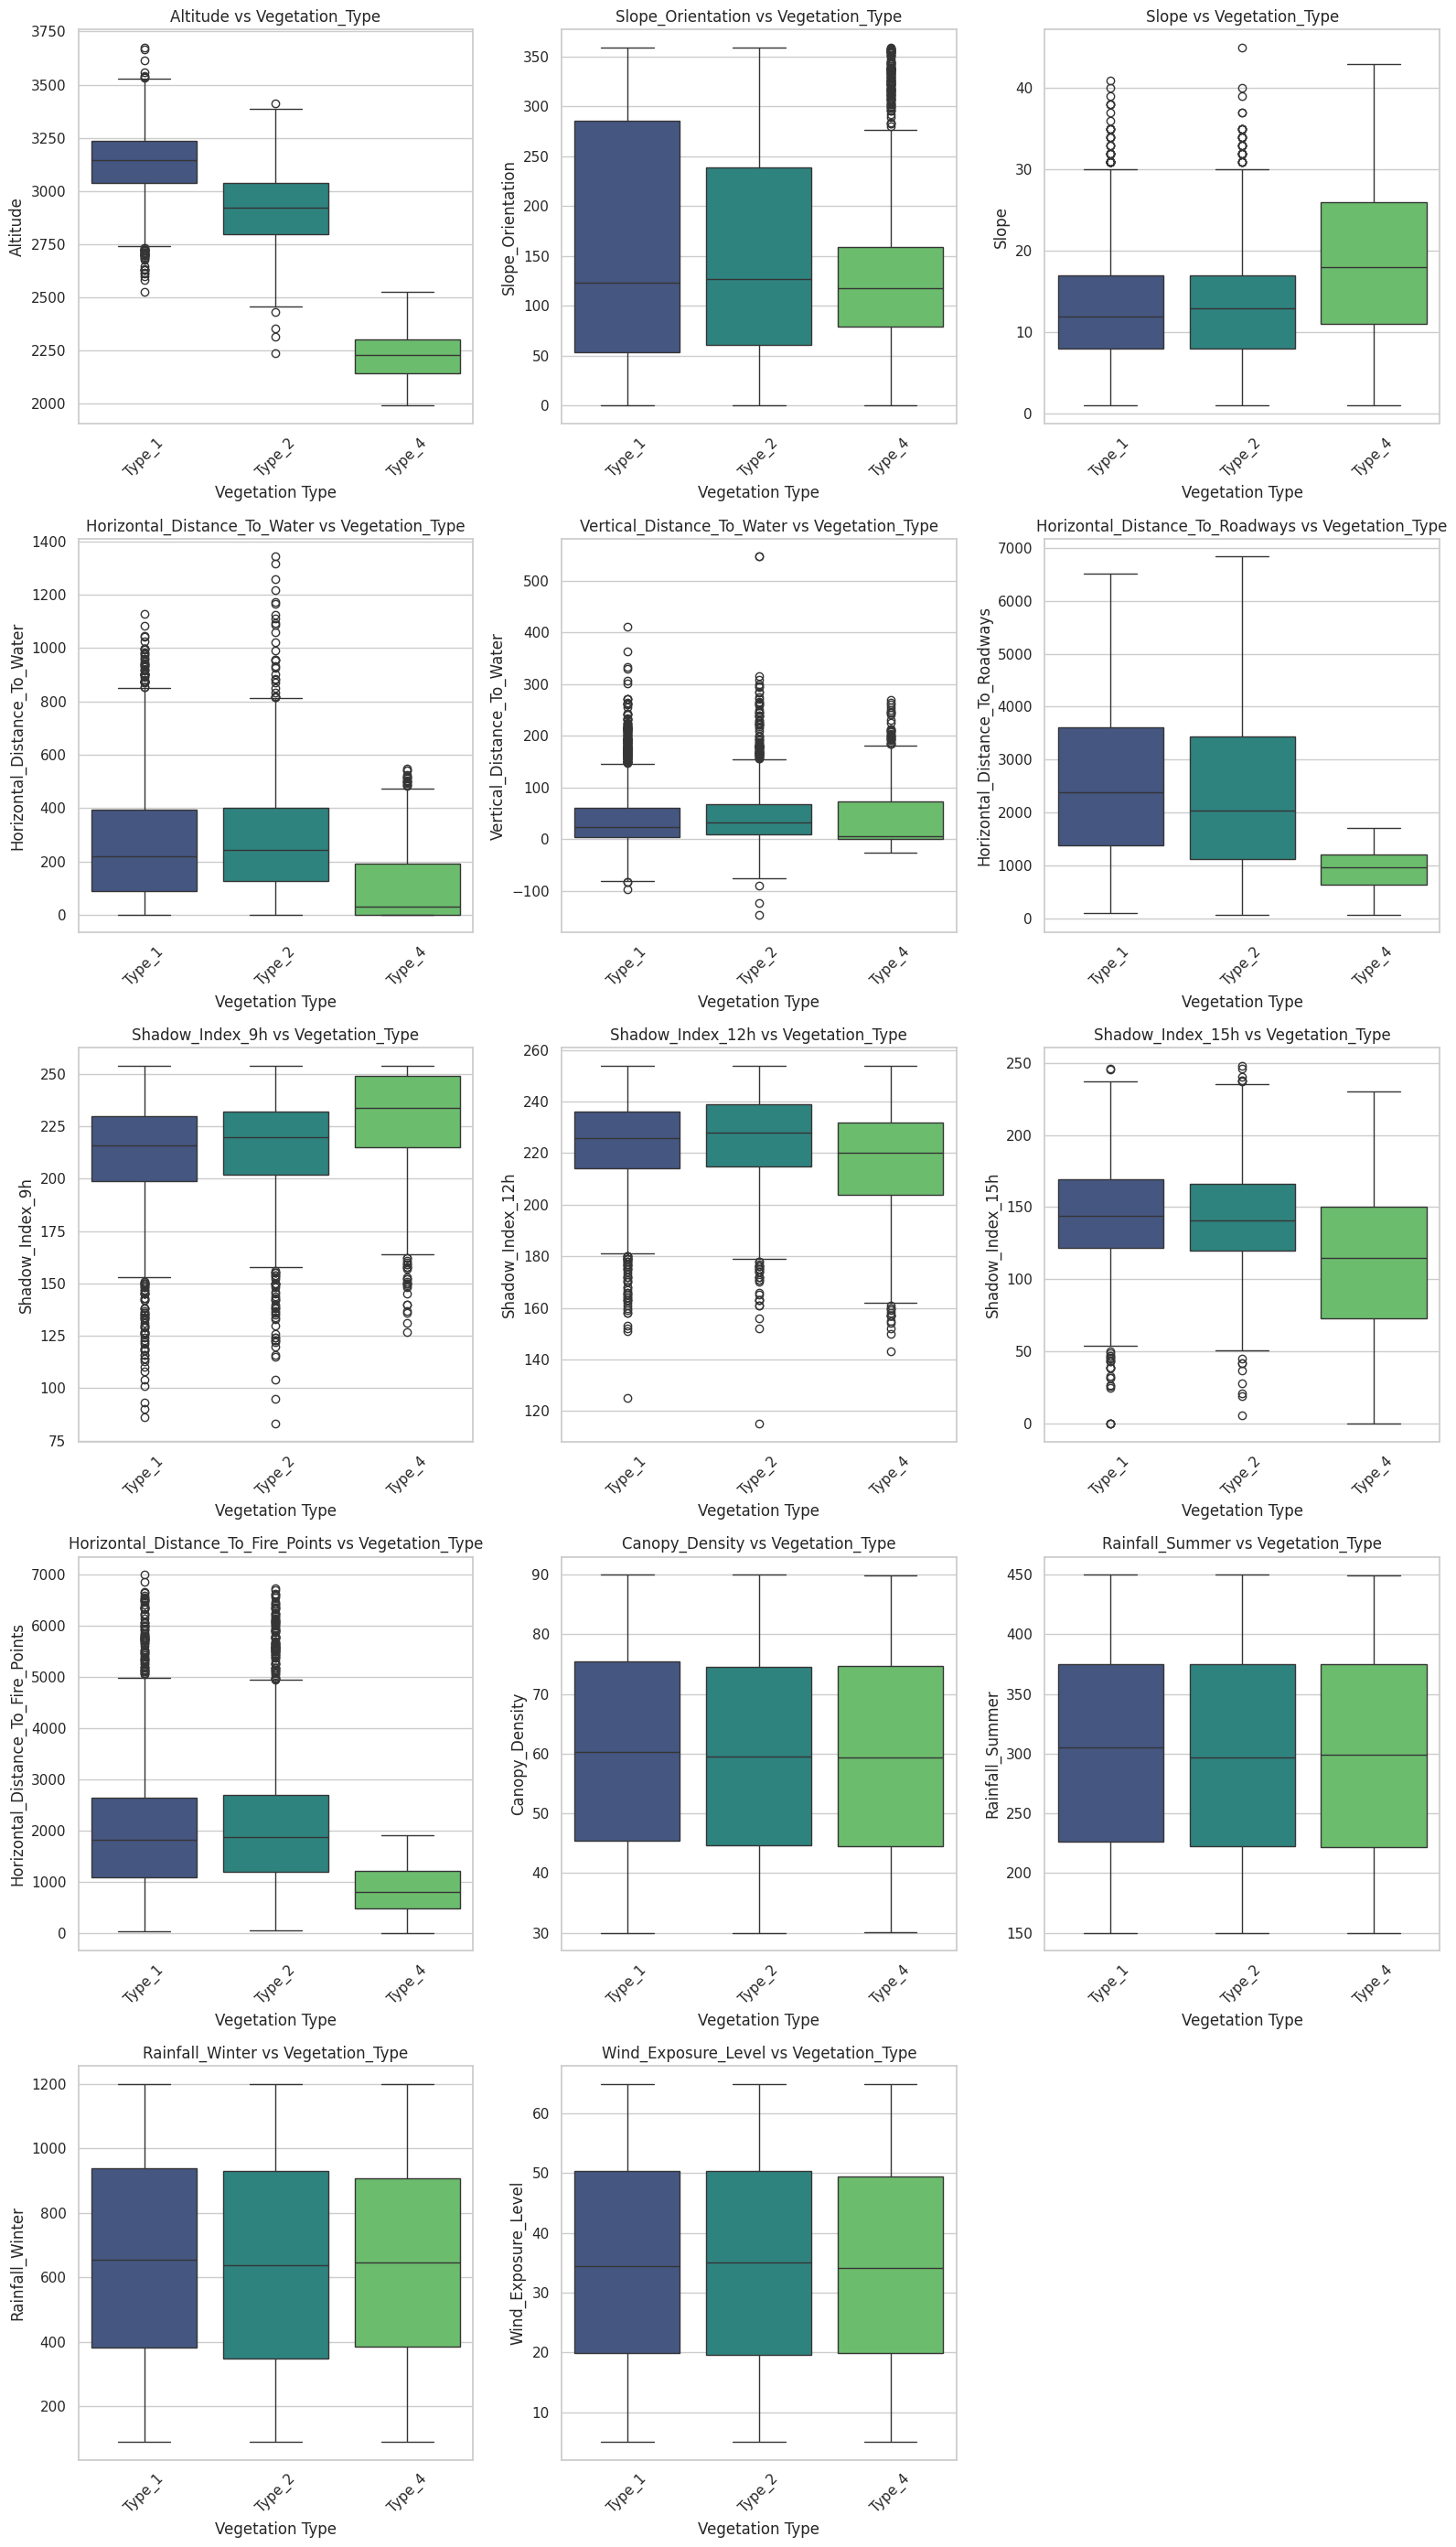

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns in the dataset
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns='Id').columns

# Create subplots for each numerical column vs the label (Vegetation_Type)
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(16, len(numerical_columns)*2))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each numerical column and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='Vegetation_Type', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{col} vs Vegetation_Type')
    axes[i].set_xlabel('Vegetation Type')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The plots clearly show that different vegetation types occur under different environmental conditions. These differences may relate to both abiotic factors (altitude, slope, precipitation) and biotic factors (competition, disturbance)

The length of the box and whiskers indicates the variability or spread of the data. A longer box or whiskers suggests a larger range of values for that particular variable

Outliers can provide valuable insights into the data. They may represent unique conditions or errors in data collection

By comparing quartiles across different vegetation types, we can assess how the distribution of values varies

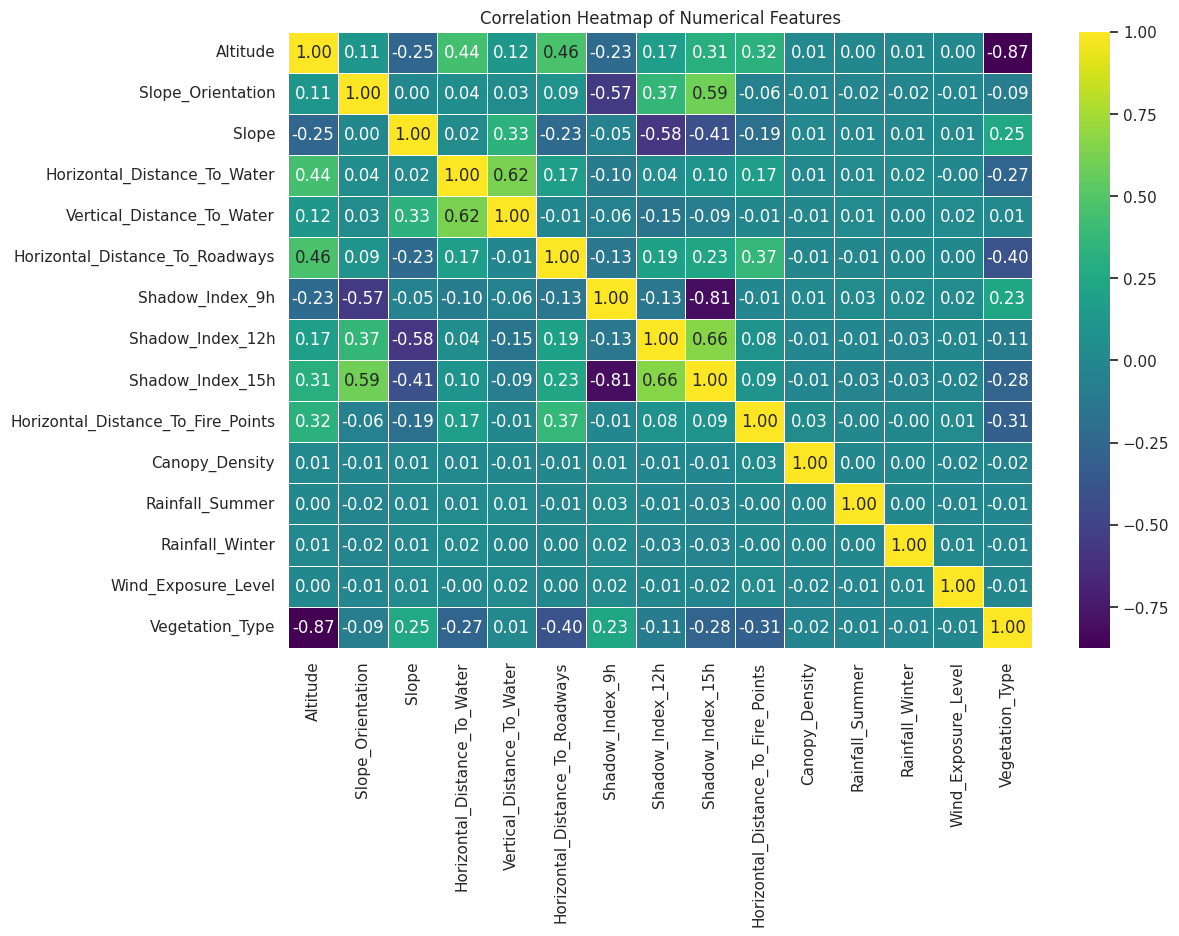

In [ ]:
# Use factorize to define the categorical target variable into classes
df['Vegetation_Type'] = df.Vegetation_Type.factorize()[0]

# List of numerical columns to include in the correlation heatmap
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope',
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water',
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h',
    'Shadow_Index_12h', 'Shadow_Index_15h',
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density',
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level',
    'Vegetation_Type'
]

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Checking the correlation between numerical characteristics is a key step in data analysis, especially before building predictive or classification models.

Analyzing correlations between features allows us to identify those that are strongly related, which may suggest that one of them could be redundant in the model, as it provides similar information. Correlations also help determine which features have the greatest impact on the dependent variable, enabling model optimization by removing less relevant features or transforming data to reduce correlations. Visualizing correlations in a heatmap format allows for a quick understanding of the overall relationships between features, helping to identify potential issues in the model caused by highly correlated features.

An example of strong correlation is the relationship between "Altitude" and "Vegetation Type" – higher altitude is associated with different types of vegetation. In contrast, features like "Rainfall_Summer" and "Rainfall_Winter" have weak correlations with other features, suggesting they may have less impact on vegetation type. Identifying these dependencies also enables a better understanding of relationships between features that are relevant for environmental analysis.

In [ ]:
df = df.drop('Shadow_Index_15h', axis=1)
df2 = df2.drop('Shadow_Index_15h', axis=1)

"Shadow_Index_15h" shows strong correlations with "Shadow_Index_9h" and "Shadow_Index_12h," indicating it may be redundant and could be removed with minimal information loss. Eliminating it can help reduce multicollinearity, particularly in models like linear regression. Furthermore, its low correlation with the target variable, "Vegetation_Type," means that removing it will simplify the model without sacrificing predictive value.

### Analysis Summary for Vegetation Types

#### Key Observations:
 - Outliers are consistently observed in certain categories between two groups, often occurring together. This pattern indicates some correlation or shared behavior in specific conditions.
 - Several features show minimal variation across categories, suggesting they may not hold significant predictive power for distinguishing between groups.
 - Some features present substantial differences in their data range and the presence of extreme values (outliers), highlighting potential key variables for separation between groups.
 - Features that display a clear separation between one group and others, especially without outliers, may serve as strong indicators in classification tasks.
 - One feature in particular shows the most pronounced difference across groups, with two groups being closely related, while the third group is distinct. This feature could be a primary candidate for identifying group differences.
 - In certain cases, the range of data for one group spans nearly the entire dataset, while other groups are more concentrated, often with outliers, pointing to variability within specific groups.

#### Information about data:

 - Type_1 and Type_2 frequently show outliers simultaneously, especially in certain features,
 while Type_4 typically does not have outliers in these instances.

 - Features such as Canopy Density, Rainfall (Summer/Winter), and Wind Exposure Level show little
 distinction between vegetation types. The ranges largely overlap, indicating limited variability
 for these features.

 - In Horizontal Distance to Water Type_1 and Type_2 display many outliers and broader data ranges, while Type_4 has fewer outliers
 and a smaller range. This suggests potential differences in behavior for these groups with respect
 to proximity to water.

 - There are minimal differences in Vertical Distance to Water across vegetation types,
 with overlapping ranges. This feature might not provide much separation between the types.

 - There is a clear separation in Horizontal Distance to Roadways feature, especially for Type_4, which shows no outliers.
 The lack of outliers and separation in this feature suggests it may be useful for distinguishing
 vegetation types.

 - In Slope type_4 shows a wide data range without outliers, while Type_1 and Type_2 are more similar to each other
 and have many outliers. The differences between these groups suggest that this feature could provide
 meaningful separation, especially for Type_4.

 - In Slope Orientation Type_1 and Type_2 cover most of the data without outliers, while Type_4 exhibits more outliers
 and a narrower range. This reversal in behavior could be an important factor in distinguishing vegetation types.

 - Altitude shows the most significant difference across the three vegetation types. Type_2 is closer to
 Type_1, while Type_4 is significantly lower, making this feature a strong candidate for classification.


#### Considerations:

 - The dataset contains multiple features that measure environmental variables related to vegetation types.
 - Three main vegetation types are analyzed: Type_1, Type_2, and Type_4.
 - The data is not normalized, and some features show outliers, particularly in certain vegetation types.
 - Key features include distances to fire points, water bodies, roadways, and altitude.
 - Some features exhibit clear distinctions between vegetation types, while others show overlapping ranges with minimal variation.
 - The goal of the analysis is to identify patterns in the data that may inform future machine learning models.
 - The outliers and range variations are especially important for understanding the separability of vegetation types.



### Statistical testing for correlation:

- ANOVA - for numerical vs target (categorical)
- Chisq - for categorical vs target (categorical)

Since we haven't convert qualitative variables to numerical yet, we need to have a function ChiSq using a croostab

## What relevant information can you extract from the Univariate and Bivariate Analysis

- ### For Univariate Analysis, focus on features with distinct separations or consistent outliers as they are most likely to impact classification.

 - Many features display broad data ranges, notable concentration points, and the presence of outliers. Features related to distances from natural landmarks (e.g., Horizontal and Vertical Distance to Water) and environmental characteristics (e.g., Slope and Altitude) consistently show extensive data ranges and outliers, capturing a variety of conditions that could aid in distinguishing vegetation types.
 - Features with compact ranges and minimal variability, such as Canopy Density and Wind Exposure Level, show substantial overlap, suggesting limited predictive value. Low-variability features may be considered for dimensionality reduction techniques or removal during preprocessing as they may not significantly improve model separability.
 - Some features, like Horizontal Distance to Roadways, show stable distributions with minimal outliers, indicating predictable values across observations that might still support classification tasks if related to stable conditions.
 - Features such as Altitude exhibit substantial range differences across groups, with values spreading more broadly in some groups than in others. These variations highlight potential key variables for separating vegetation types.



 - **Normalization Consideration:** Given the class imbalance present in the dataset, normalization techniques (such as Min-Max scaling or Z-score standardization) should be employed. This is crucial as it helps to ensure that features contribute equally to the distance calculations used in various machine learning algorithms, preventing the model from being biased towards the majority class due to differing scales of the features. Normalization can enhance model performance and interpretability by stabilizing variance across features.


- ### For Bivariate Analysis, features that show strong correlations with vegetation types are key for creating effective machine learning models, while features with overlapping ranges can likely be dropped or reduced to streamline the process.
 - Features like Altitude, Horizontal Distance to Fire Points, Slope, and Horizontal Distance to Roadways show strong correlations with vegetation types and are key candidates for predictive modeling.
 - Outliers can indicate unique conditions, but shared outliers between Type_1 and Type_2 suggest these groups may share common environmental factors, possibly complicating classification between them.
 - Features with weak correlations should be considered for feature selection or reduction, as they may not add significant value to predictive models.
 - By eliminating features not correlated with the label, we should obtain the same results as before

# 3. Method Application - LogReg, LDA, and QDA with different types of resampling

In [ ]:
df = pd.get_dummies(df, columns=['Soil_Type', 'Wilderness_Area'])
df_ready = pd.get_dummies(df_ready, columns = ['Soil_Type', 'Wilderness_Area'])

In [ ]:
# Split into features (X) and target (y)
X = df.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables, drop Id and the target variable
y = df['Vegetation_Type']  # target variable

X_ready = df_ready.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables, drop Id and the target variable
y_ready = df_ready['Vegetation_Type']  # target variable

# Import the standard scaler
from sklearn.preprocessing import StandardScaler

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the input data
X_scaled_ready = scaler.fit_transform(X_ready)

The dataset is divided into features and the target variable, removing non-informative columns like identifiers to reduce noise and overfitting. Then, scaling is applied using standardization, which normalizes the data by removing the mean and scaling to unit variance. This ensures all features contribute equally, preventing any single feature from dominating due to larger values.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

model = LogisticRegression(max_iter=1000, class_weight="balanced") ##
model2 = LDA()
model3 = QDA()

We are creating three different models

# Holdout function

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Holdout resampling
def holdout(model, model_name, X, y, test_size=0.2, random_state=42, plot_conf_matrix=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Holdout F1 Score for {model_name}: {f1:.6f}")

    # Drawing the confusion matrix if plot_conf_matrix is True.
    if plot_conf_matrix:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues')
        plt.title(f'Holdout Confusion Matrix - {model_name}')
        plt.show()

def holdout_for_balanced(model, model_name, X, y, test_size=0.2, random_state=42, plot_conf_matrix=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate F1 score and accuracy
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)
    print(f"Holdout F1 Score for {model_name}: {f1:.6f}")
    print(f"Holdout Accuracy for {model_name}: {acc:.6f}")

    # Drawing the confusion matrix if plot_conf_matrix is True.
    if plot_conf_matrix:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues')
        plt.title(f'Holdout Confusion Matrix - {model_name}')
        plt.show()



# CV function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

# Cross-validation resampling for unbalanced dataset
def cross_val_unbalanced(model, model_name, X, y, k=5, plot_conf_matrix=False):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    f1_scores = []
    y_preds = []
    y_tests = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)
        y_preds.append(y_pred)
        y_tests.append(y_test)

    print(f"Cross-Validation F1 Score for {model_name} (k={k}): {np.mean(f1_scores):.6f}")

    # Drawing the confusion matrix if plot_conf_matrix is True.
    if plot_conf_matrix:
        # You can draw the confusion matrix for the last iteration or for the average value.
        cm = confusion_matrix(np.concatenate(y_tests), np.concatenate(y_preds))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues')
        plt.title(f'Cross-Validation Confusion Matrix - {model_name}')
        plt.show()


# Cross-validation resampling for balanced dataset
def cross_val_balanced(model, model_name, X, y, k=10, plot_conf_matrix=False):
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    f1_scores = []
    accuracies = []
    y_preds = []
    y_tests = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        accuracies.append(acc)
        y_preds.append(y_pred)
        y_tests.append(y_test)

    print(f"Cross-Validation F1 Score for {model_name} (k={k}): {np.mean(f1_scores):.6f}")
    print(f"Cross-Validation Accuracy for {model_name} (k={k}): {np.mean(accuracies):.6f}")

    # Drawing the confusion matrix if plot_conf_matrix is True.
    if plot_conf_matrix:
        cm = confusion_matrix(np.concatenate(y_tests), np.concatenate(y_preds))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues')
        plt.title(f'Cross-Validation Confusion Matrix - {model_name}')
        plt.show()


# LOOCV function

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score, accuracy_score

# Leave-One-Out Cross-Validation for unbalanced dataset
def loocv_unbalanced(model, model_name, X, y, plot_conf_matrix=False):
    # Ensure X is a DataFrame and y is a Series
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)  # Convert to DataFrame
    if isinstance(y, np.ndarray):
        y = pd.Series(y)  # Convert to Series

    loo = LeaveOneOut()
    f1_scores = []
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Ensure X is a DataFrame
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Ensure y is a Series

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

        # Collect true and predicted labels
        y_true_all.append(y_test.values[0])  # Using .values to avoid warning
        y_pred_all.append(y_pred[0])

    # Final confusion matrix
    if plot_conf_matrix:
        cm = confusion_matrix(y_true_all, y_pred_all, labels=model.classes_)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix for {model_name} - LOOCV (Unbalanced)")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.xticks(ticks=np.arange(len(model.classes_)) + 0.5, labels=model.classes_, rotation=45)
        plt.yticks(ticks=np.arange(len(model.classes_)) + 0.5, labels=model.classes_, rotation=0)
        plt.show()

    print(f"LOOCV F1 Score for {model_name}: {np.mean(f1_scores):.6f}")

# Leave-One-Out Cross-Validation for balanced dataset
def loocv_balanced(model, model_name, X, y, plot_conf_matrix=False):
    # Ensure X is a DataFrame and y is a Series
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)  # Convert to DataFrame
    if isinstance(y, np.ndarray):
        y = pd.Series(y)  # Convert to Series

    loo = LeaveOneOut()
    f1_scores = []
    accuracies = []
    y_true_all = []
    y_pred_all = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Ensure X is a DataFrame
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Ensure y is a Series

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        accuracies.append(acc)

        # Collect true and predicted labels
        y_true_all.append(y_test.values[0])  # Using .values to avoid warning
        y_pred_all.append(y_pred[0])

    # Final confusion matrix
    if plot_conf_matrix:
        cm = confusion_matrix(y_true_all, y_pred_all, labels=model.classes_)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix for {model_name} - LOOCV (Balanced)")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.xticks(ticks=np.arange(len(model.classes_)) + 0.5, labels=model.classes_, rotation=45)
        plt.yticks(ticks=np.arange(len(model.classes_)) + 0.5, labels=model.classes_, rotation=0)
        plt.show()

    print(f"LOOCV F1 Score for {model_name}: {np.mean(f1_scores):.6f}")
    print(f"LOOCV Accuracy for {model_name}: {np.mean(accuracies):.6f}")


# Bootstrap function

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split

def bootstrap_unbalanced(model, model_name, X, y, n_iterations=1000, plot_conf_matrix=False):
    f1_scores = []

    # Ensure X is a DataFrame and y is a Series
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
    y = pd.Series(y) if not isinstance(y, pd.Series) else y

    # Initialize lists to collect predictions and true labels for the last iteration
    y_preds = []
    y_tests = []

    for _ in range(n_iterations):
        # Randomly sample with replacement
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_bootstrap = X.iloc[indices].reset_index(drop=True)  # Reset index
        y_bootstrap = y.iloc[indices].reset_index(drop=True)  # Reset index

        # Split the bootstrap sample into training and test sets
        test_indices = np.random.choice(len(X_bootstrap), size=int(len(X_bootstrap) * 0.2), replace=False)
        train_indices = np.setdiff1d(np.arange(len(X_bootstrap)), test_indices)

        X_train, X_test = X_bootstrap.iloc[train_indices], X_bootstrap.iloc[test_indices]
        y_train, y_test = y_bootstrap.iloc[train_indices], y_bootstrap.iloc[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

        # Collect predictions and true labels for confusion matrix
        y_preds.extend(y_pred)
        y_tests.extend(y_test)

    print(f"Bootstrap F1 Score for {model_name}: {np.mean(f1_scores):.6f}")

    # Draw confusion matrix if plot_conf_matrix is True
    if plot_conf_matrix:
        cm = confusion_matrix(y_tests, y_preds, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues', colorbar=False)
        plt.title(f'Bootstrap Confusion Matrix - {model_name}')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score

def bootstrap_balanced(model, model_name, X, y, n_iterations=1000, plot_conf_matrix=False):
    f1_scores = []
    accuracies = []

    # Ensure X is a DataFrame and y is a Series
    X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
    y = pd.Series(y) if not isinstance(y, pd.Series) else y

    # Initialize lists to collect predictions and true labels
    y_preds = []
    y_tests = []

    for _ in range(n_iterations):
        # Get unique class labels
        unique_classes = np.unique(y)

        # Create an empty list to store the bootstrap indices
        bootstrap_indices = []

        # Sample for each class separately
        for cls in unique_classes:
            # Get indices of samples belonging to the current class
            cls_indices = np.where(y == cls)[0]

            # Sample from the class indices with replacement
            cls_bootstrap_indices = np.random.choice(cls_indices, size=len(cls_indices), replace=True)

            # Add the sampled indices for the class to the overall list
            bootstrap_indices.extend(cls_bootstrap_indices)

        # Shuffle the bootstrap indices
        np.random.shuffle(bootstrap_indices)

        # Convert the list of bootstrap indices to a NumPy array for efficient indexing
        bootstrap_indices = np.array(bootstrap_indices)

        # Index the data using the bootstrap indices
        X_bootstrap = X.iloc[bootstrap_indices].reset_index(drop=True)  # Convert to DataFrame
        y_bootstrap = y.iloc[bootstrap_indices].reset_index(drop=True)  # Convert to Series

        # Split the bootstrap sample into training and test sets
        test_indices = np.random.choice(len(X_bootstrap), size=int(len(X_bootstrap) * 0.2), replace=False)
        train_indices = np.setdiff1d(np.arange(len(X_bootstrap)), test_indices)

        # Indexing the bootstrap data
        X_train = X_bootstrap.iloc[train_indices]
        X_test = X_bootstrap.iloc[test_indices]
        y_train = y_bootstrap.iloc[train_indices]
        y_test = y_bootstrap.iloc[test_indices]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)

        f1_scores.append(f1)
        accuracies.append(acc)

        # Collect predictions and true labels for confusion matrix
        y_preds.extend(y_pred)
        y_tests.extend(y_test)

    print(f"Bootstrap F1 Score for {model_name}: {np.mean(f1_scores):.6f}")
    print(f"Bootstrap Accuracy for {model_name}: {np.mean(accuracies):.6f}\n")

    # Draw confusion matrix if plot_conf_matrix is True
    if plot_conf_matrix:
        cm = confusion_matrix(y_tests, y_preds, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues', colorbar=False)
        plt.title(f'Bootstrap Confusion Matrix - {model_name}')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()


We evaluate models on both balanced and unbalanced datasets. These resampling techniques provide robust estimates of model performance by splitting or resampling the data in various ways. For balanced datasets, accuracy is a reliable metric, as class distributions are even. However, for imbalanced datasets, accuracy can be misleading, as it may reflect high performance while ignoring minority classes. In such cases, metrics like precision, recall, or F1-score are more appropriate for assessing model quality.

# Evaluation function

In [ ]:
def evaluate_unbalanced(model, model_name, X_unbalanced, y_unbalanced, n_iterations=5):
    print(f"\nEvaluating unbalanced model: {model_name}\n")

    # Holdout
    holdout(model, model_name, X_unbalanced, y_unbalanced, plot_conf_matrix=False)

    # Cross-validation 5-fold
    cross_val_unbalanced(model, model_name, X_unbalanced, y_unbalanced, k=5, plot_conf_matrix=False)

    # Cross-validation 10-fold
    cross_val_unbalanced(model, model_name, X_unbalanced, y_unbalanced, k=10, plot_conf_matrix=False)

    # Leave-One-Out Cross-Validation
    loocv_unbalanced(model, model_name, X_unbalanced, y_unbalanced, plot_conf_matrix=False)

    # Bootstrap
    bootstrap_unbalanced(model, model_name, X_unbalanced, y_unbalanced, n_iterations=n_iterations, plot_conf_matrix=False)

# Przykładowe użycie
evaluate_unbalanced(model, "LogReg", X_scaled, y)
evaluate_unbalanced(model2, "LDA", X_scaled, y)
evaluate_unbalanced(model3, "QDA", X_scaled, y)



Evaluating unbalanced model: LogReg

Holdout F1 Score for LogReg: 0.821278
Cross-Validation F1 Score for LogReg (k=5): 0.830550
Cross-Validation F1 Score for LogReg (k=10): 0.827579
LOOCV F1 Score for LogReg: 0.830103
Bootstrap F1 Score for LogReg: 0.827731

Evaluating unbalanced model: LDA

Holdout F1 Score for LDA: 0.818608
Cross-Validation F1 Score for LDA (k=5): 0.820059
Cross-Validation F1 Score for LDA (k=10): 0.825027
LOOCV F1 Score for LDA: 0.831395
Bootstrap F1 Score for LDA: 0.818178

Evaluating unbalanced model: QDA

Holdout F1 Score for QDA: 0.649837
Cross-Validation F1 Score for QDA (k=5): 0.634613
Cross-Validation F1 Score for QDA (k=10): 0.638442
LOOCV F1 Score for QDA: 0.708441
Bootstrap F1 Score for QDA: 0.656517


In [ ]:
def evaluate_balanced(model, model_name, X_balanced, y_balanced, n_iterations=10):
    print(f"\nEvaluating balanced model: {model_name}\n")

    # Holdout
    holdout_for_balanced(model, model_name, X_balanced, y_balanced, plot_conf_matrix=False)

    # Cross-validation 5-fold
    cross_val_balanced(model, model_name, X_balanced, y_balanced, k=5, plot_conf_matrix=False)

    # Cross-validation 10-fold
    cross_val_balanced(model, model_name, X_balanced, y_balanced, k=10, plot_conf_matrix=False)

    # Leave-One-Out Cross-Validation (zakomentowane, jeśli nie potrzebne)
    loocv_balanced(model, model_name, X_balanced, y_balanced, plot_conf_matrix=False)

    # Bootstrap
    bootstrap_balanced(model, model_name, X_balanced, y_balanced, n_iterations=n_iterations, plot_conf_matrix=False)

# Przykładowe użycie
evaluate_balanced(model, "LogReg", X_scaled_ready, y_ready)
evaluate_balanced(model2, "LDA", X_scaled_ready, y_ready)
evaluate_balanced(model3, "QDA", X_scaled_ready, y_ready)



Evaluating balanced model: LogReg

Holdout F1 Score for LogReg: 0.832850
Holdout Accuracy for LogReg: 0.833333
Cross-Validation F1 Score for LogReg (k=5): 0.837503
Cross-Validation Accuracy for LogReg (k=5): 0.837778
Cross-Validation F1 Score for LogReg (k=10): 0.839378
Cross-Validation Accuracy for LogReg (k=10): 0.839683
LOOCV F1 Score for LogReg: 0.838413
LOOCV Accuracy for LogReg: 0.838413
Bootstrap F1 Score for LogReg: 0.838927
Bootstrap Accuracy for LogReg: 0.839048


Evaluating balanced model: LDA

Holdout F1 Score for LDA: 0.837665
Holdout Accuracy for LDA: 0.838095
Cross-Validation F1 Score for LDA (k=5): 0.843491
Cross-Validation Accuracy for LDA (k=5): 0.843810
Cross-Validation F1 Score for LDA (k=10): 0.840291
Cross-Validation Accuracy for LDA (k=10): 0.840635
LOOCV F1 Score for LDA: 0.840317
LOOCV Accuracy for LDA: 0.840317
Bootstrap F1 Score for LDA: 0.743903
Bootstrap Accuracy for LDA: 0.783651


Evaluating balanced model: QDA

Holdout F1 Score for QDA: 0.606876
Holdout

From these observations, it can be concluded that cross-validation (especially with k=5) and Leave-One-Out Cross-Validation (LOOCV) are the most effective validation methods for the evaluated models, providing the most stable and representative results. Holdout may be less reliable, particularly in cases where the data is unbalanced. Bootstrap also demonstrates good performance, but it is slightly lower than that of cross-validation.


# 4. Feature selection with statistical tests, Lasso Model,  ridge regression

In [ ]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

## Chi-Squared Test for Feature Selection

The Chi-Squared test is a statistical method used to evaluate the association between two categorical variables. By analyzing the frequency of occurrences in each category, it determines whether the variables are independent. The test generates a Chi-Squared statistic and a p-value, with a low p-value (typically < 0.05) indicating a significant association between the categorical feature and the categorical target variable.

### Important notes
- A low p-value suggests that the feature contains relevant information that could improve predictive accuracy.
- The Chi-Squared test helps identify categorical features that correlate with the target variable, aiding in the selection of the most meaningful predictors.
- This process ultimately enhances the model's robustness and its ability to generalize to unseen data.

In the provided function, `FunctionChisq`, we utilize the Chi-Squared test to select categorical predictors. For each predictor in the specified list, we create a contingency table using `pd.crosstab`, apply the Chi-Squared test, and check the p-value. Features with p-values less than 0.05 are considered correlated with the target variable and are included in the final list of selected predictors.


In [ ]:
cat_corr = FunctionChisq(df2, 'Vegetation_Type', categorical_columns)

Wilderness_Area is correlated with Vegetation_Type | P-Value: 0.0
Vegetation_Type is correlated with Vegetation_Type | P-Value: 0.0


In [ ]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

## ANOVA for Feature Selection

ANOVA (Analysis of Variance) is a statistical method used to compare the means of numerical features across different categories of a categorical target variable. This technique assesses whether there are statistically significant differences between group means, helping to identify features that have a meaningful impact on the target variable.

### Important notes:
- A low p-value (typically < 0.05) indicates that at least one group mean differs significantly from the others, suggesting a potential correlation with the target variable.
- By identifying features that contribute valuable information, ANOVA enhances model accuracy by retaining only those that are statistically significant, reducing noise, and improving interpretability.

In the provided function, `FunctionAnova`, we utilize ANOVA for feature selection of numerical predictors. For each predictor in the specified list, we group the data by the target variable and apply the ANOVA test using `f_oneway`. Features with p-values less than 0.05 are considered correlated with the target variable and are included in the final list of selected predictors.


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns='Id').columns
nn_corr = FunctionAnova(df2, 'Vegetation_Type', numerical_columns)

##### ANOVA Results ##### 

Altitude is correlated with Vegetation_Type | P-Value: 0.0
Slope_Orientation is correlated with Vegetation_Type | P-Value: 4.4613352149742616e-09
Slope is correlated with Vegetation_Type | P-Value: 2.3512285023743643e-86
Horizontal_Distance_To_Water is correlated with Vegetation_Type | P-Value: 1.1148757719804476e-124
Vertical_Distance_To_Water is correlated with Vegetation_Type | P-Value: 0.006029064050032149
Horizontal_Distance_To_Roadways is correlated with Vegetation_Type | P-Value: 2.2288441298642903e-223
Shadow_Index_9h is correlated with Vegetation_Type | P-Value: 4.6012200214562255e-67
Shadow_Index_12h is correlated with Vegetation_Type | P-Value: 6.497469405426438e-27
Horizontal_Distance_To_Fire_Points is correlated with Vegetation_Type | P-Value: 9.207330079542169e-183
Canopy_Density is NOT correlated with Vegetation_Type | P-Value: 0.3675245146028033
Rainfall_Summer is NOT correlated with Vegetation_Type | P-Value: 0.3959709535545417
Rainfall_Wint

In [ ]:
df_fs = df.drop(['Canopy_Density', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'], axis=1)
df_ready_fs = df_ready.drop(['Canopy_Density', 'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'], axis=1)

In [ ]:
# Split into features (X) and target (y)
X = df_fs.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables, drop Id and the target variable
y = df_fs['Vegetation_Type']  # target variable

X_ready = df_ready_fs.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables, drop Id and the target variable
y_ready = df_ready_fs['Vegetation_Type']  # target variable

# Import the standard scaler
from sklearn.preprocessing import StandardScaler

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the input data
X_scaled_ready = scaler.fit_transform(X_ready)

In [ ]:
# Przykładowe użycie
evaluate_unbalanced(model, "LogReg", X_scaled, y)
evaluate_unbalanced(model2, "LDA", X_scaled, y)
evaluate_unbalanced(model3, "QDA", X_scaled, y)



Evaluating unbalanced model: LogReg

Holdout F1 Score for LogReg: 0.821278
Cross-Validation F1 Score for LogReg (k=5): 0.829892
Cross-Validation F1 Score for LogReg (k=10): 0.828317
LOOCV F1 Score for LogReg: 0.831611
Bootstrap F1 Score for LogReg: 0.831856

Evaluating unbalanced model: LDA

Holdout F1 Score for LDA: 0.819788
Cross-Validation F1 Score for LDA (k=5): 0.822781
Cross-Validation F1 Score for LDA (k=10): 0.826272
LOOCV F1 Score for LDA: 0.831611
Bootstrap F1 Score for LDA: 0.826392

Evaluating unbalanced model: QDA

Holdout F1 Score for QDA: 0.708752
Cross-Validation F1 Score for QDA (k=5): 0.663785
Cross-Validation F1 Score for QDA (k=10): 0.653999
LOOCV F1 Score for QDA: 0.723084
Bootstrap F1 Score for QDA: 0.650737


In [ ]:
evaluate_balanced(model, "LogReg", X_scaled_ready, y_ready)
evaluate_balanced(model2, "LDA", X_scaled_ready, y_ready)
evaluate_balanced(model3, "QDA", X_scaled_ready, y_ready)


Evaluating balanced model: LogReg

Holdout F1 Score for LogReg: 0.842401
Holdout Accuracy for LogReg: 0.842857
Cross-Validation F1 Score for LogReg (k=5): 0.838777
Cross-Validation Accuracy for LogReg (k=5): 0.839048
Cross-Validation F1 Score for LogReg (k=10): 0.841281
Cross-Validation Accuracy for LogReg (k=10): 0.841587
LOOCV F1 Score for LogReg: 0.841587
LOOCV Accuracy for LogReg: 0.841587
Bootstrap F1 Score for LogReg: 0.846762
Bootstrap Accuracy for LogReg: 0.846825


Evaluating balanced model: LDA

Holdout F1 Score for LDA: 0.842318
Holdout Accuracy for LDA: 0.842857
Cross-Validation F1 Score for LDA (k=5): 0.842224
Cross-Validation Accuracy for LDA (k=5): 0.842540
Cross-Validation F1 Score for LDA (k=10): 0.840618
Cross-Validation Accuracy for LDA (k=10): 0.840952
LOOCV F1 Score for LDA: 0.842222
LOOCV Accuracy for LDA: 0.842222
Bootstrap F1 Score for LDA: 0.829719
Bootstrap Accuracy for LDA: 0.831111


Evaluating balanced model: QDA

Holdout F1 Score for QDA: 0.660958
Holdout

In [ ]:
from typing import Union
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def process_regression_model(
    regression_model: Union[RidgeCV, LassoCV, ElasticNetCV],
    alphas: np.ndarray,
    X: pd.DataFrame,
    y: pd.Series,
    use_cv: bool = True,
    test_size: float = 0.2,
    random_state: int = 42
):
    """
    Fit a regression model (Ridge, Lasso or ElasticNet) over a range of regularization parameters (alphas)
    and compute the corresponding coefficients, mean squared error, and R² score.

    Parameters:
    - regression_model: the regression model class (e.g., RidgeCV, LassoCV, ElasticNetCV)
    - alphas: array of alpha values for regularization
    - X: features DataFrame
    - y: target Series
    - use_cv: boolean indicating whether to use cross-validation to find the best alpha
    - test_size: proportion of the dataset to include in the test split
    - random_state: random seed for reproducibility
    """
    # Convert categorical target ('Vegetation_Type') to numerical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)

    # Cross-validation to find the best alpha
    if use_cv:
        if regression_model == RidgeCV:
            cv_model = RidgeCV(alphas=alphas)
        elif regression_model == LassoCV:
            cv_model = LassoCV(alphas=alphas, cv=5, random_state=random_state)
        else:  # ElasticNetCV
            cv_model = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5, random_state=random_state)

        cv_model.fit(X_train, y_train)
        best_alpha = cv_model.alpha_
        print(f"Best alpha after Cross Validation: {best_alpha}")

        # Use the cross-validated model directly
        regression_model_instance = cv_model
    else:
        regression_model_instance = regression_model()  # Default initialization

    # Fit the model
    regression_model_instance.fit(X_train, y_train)
    y_pred = regression_model_instance.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.5f}")
    print(f"R² Score: {r2:.5f}")

    # Get and sort coefficients
    coef_series = pd.Series(regression_model_instance.coef_, index=X.columns)
    sorted_coef = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)

    print("Coefficients sorted by absolute value:")
    print(sorted_coef)

# Example usage
# Assuming df_ready_fs is your cleaned DataFrame and 'Vegetation_Type' is your target
X = df_ready_fs.drop('Vegetation_Type', axis=1)
y = df_ready_fs['Vegetation_Type']

# Define alphas for Ridge, Lasso, or ElasticNet
alphas = 10**np.linspace(10,-2,100)*0.5  # Example alpha values

# Collect coefficients for plotting
ridge_coefs = process_regression_model(RidgeCV, alphas, X, y)
print('\n\n')
lasso_coefs = process_regression_model(LassoCV, alphas, X, y)
print('\n\n')
elasticnet_coefs = process_regression_model(ElasticNetCV, alphas, X, y)

# Prepare the coefficients for plotting
all_coefs = [ridge_coefs, lasso_coefs, elasticnet_coefs]

Best alpha after Cross Validation: 0.3289666123287841
Mean Squared Error: 0.11681
R² Score: 0.82799
Coefficients sorted by absolute value:
Soil_Type_Type_36                     0.583849
Soil_Type_Type_25                     0.552019
Wilderness_Area_Area_4                0.381268
Soil_Type_Type_27                    -0.260234
Soil_Type_Type_38                    -0.227168
Soil_Type_Type_34                     0.217058
Soil_Type_Type_22                    -0.208318
Soil_Type_Type_21                    -0.206165
Wilderness_Area_Area_3               -0.195865
Soil_Type_Type_23                    -0.189331
Soil_Type_Type_5                      0.162541
Soil_Type_Type_18                    -0.156719
Soil_Type_Type_39                    -0.153345
Wilderness_Area_Area_1               -0.148868
Soil_Type_Type_35                    -0.143234
Soil_Type_Type_28                     0.128758
Soil_Type_Type_13                     0.114890
Soil_Type_Type_16                    -0.101933
Soil_Type_Type_

#Ridge Regression:
Linear regression technique that adds a penalty for large coefficient values to the cost function. In Ridge regression, there are no coefficients that are completely zero, which means the model uses all features, but their values are reduced. The coefficients are decreased but not eliminated, allowing for the retention of information from various features.
#Lasso Regression:
Introduces a similar penalty mechanism as Ridge but includes an additional component that allows for the complete elimination of coefficients from the model (zeroing). Coefficient values that are close to zero can be reduced to zero, indicating that these features do not influence the predicted variable.
# Elastic Net:
Similar to Lasso, many coefficients in the Elastic Net model are close to zero. Coefficient values that have been reduced to zero indicate features that do not contribute to predicting the target variable. Elastic Net, like Lasso, can reduce coefficients to zero, facilitating the creation of a more interpretable model.

# Comparision:
The best results were achieved with the Ridge model, which attained a Mean Squared Error (MSE) of 0.11681 and an R² Score of 0.82799. These values indicate a better fit of the model to the data compared to the other models. The results for the Lasso and Elastic models were similar to each other but did not reach the high performance of the Ridge model. Both of these models exhibited smaller coefficient influences, suggesting that they did not fully leverage the information available in the data.


Best alpha after Cross Validation for Ridge: 0.3289666123287841
Best alpha after Cross Validation for Lasso: 0.005
Best alpha after Cross Validation for ElasticNet: 0.005


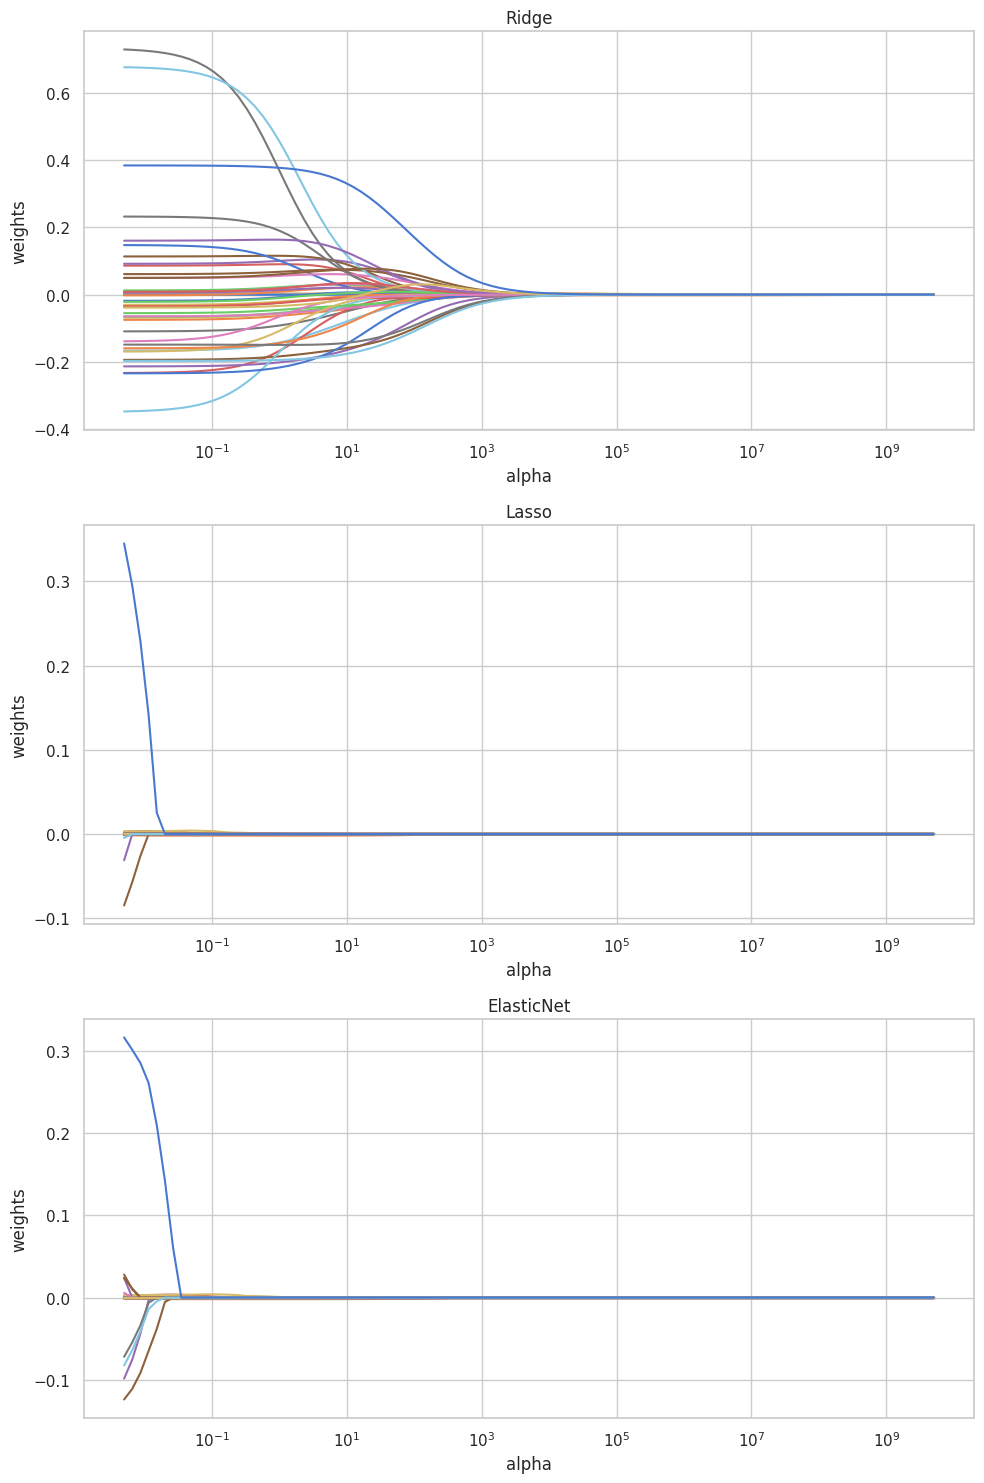

In [ ]:
from typing import Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm  # Import the tqdm module

def process_regression_model(
    regression_model: Union[RidgeCV, LassoCV, ElasticNetCV],
    alphas: np.ndarray,
    X: pd.DataFrame,
    y: pd.Series,
    use_cv: bool = True,
    test_size: float = 0.2,
    random_state: int = 42
):
    # Convert categorical target ('Vegetation_Type') to numerical labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)

    # Prepare to collect coefficients for each alpha
    all_coefs = []

    # Cross-validation to find the best alpha
    if use_cv:
        if regression_model == RidgeCV:
            cv_model = RidgeCV(alphas=alphas)
            cv_model.fit(X_train, y_train)
            best_alpha = cv_model.alpha_
            print(f"Best alpha after Cross Validation for Ridge: {best_alpha}")

            # Get coefficients for each alpha
            for alpha in alphas:
                model = RidgeCV(alphas=[alpha])  # Initialize a new model for each alpha
                model.fit(X_train, y_train)
                all_coefs.append(model.coef_)
        elif regression_model == LassoCV:
            cv_model = LassoCV(alphas=alphas, cv=5, random_state=random_state)
            cv_model.fit(X_train, y_train)
            best_alpha = cv_model.alpha_
            print(f"Best alpha after Cross Validation for Lasso: {best_alpha}")

            # Get coefficients for each alpha
            for alpha in alphas:
                model = LassoCV(alphas=[alpha], cv=5, random_state=random_state)  # Re-initialize for each alpha
                model.fit(X_train, y_train)
                all_coefs.append(model.coef_)
        else:  # ElasticNetCV
            cv_model = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5, random_state=random_state)
            cv_model.fit(X_train, y_train)
            best_alpha = cv_model.alpha_
            print(f"Best alpha after Cross Validation for ElasticNet: {best_alpha}")

            # Get coefficients for each alpha
            for alpha in alphas:
                model = ElasticNetCV(alphas=[alpha], l1_ratio=0.5, cv=5, random_state=random_state)  # Re-initialize for each alpha
                model.fit(X_train, y_train)
                all_coefs.append(model.coef_)
    else:
        # For Ridge, Lasso, and ElasticNet when not using CV
        model = regression_model()
        model.fit(X_train, y_train)
        all_coefs.append(model.coef_)

    # Convert all coefficients to a NumPy array for easier plotting
    return np.array(all_coefs), X_train, X_test, y_train, y_test  # Return train/test sets

def calculate_bias_variance(model_class, alphas, X_train, X_test, y_train, y_test, n_runs=10):
    """
    Calculate the bias and variance of the model predictions.
    """
    bias = []
    variance = []
    mse_calculated = []  # Store calculated MSE

    for alpha in tqdm(alphas, desc="Calculating Bias and Variance"):
        bias_run = []
        variance_run = []
        noise_variance_run = []  # To store noise variance for each run

        for _ in range(n_runs):
            # Initialize the model with the current alpha
            if model_class == LassoCV:
                model = model_class(alphas=[alpha], cv=5, random_state=42)
            else:
                model = model_class(alphas=[alpha])  # RidgeCV and ElasticNetCV don't take random_state

            # Fit the model
            model.fit(X_train, y_train)

            # Predict on the test set
            y_test_pred = model.predict(X_test)

            # Calculate bias as the MSE between predicted and actual values
            bias_run.append(np.mean((y_test_pred - y_test) ** 2))  # Mean Squared Error as bias
            variance_run.append(np.var(y_test_pred))  # Variance of predictions

            # Calculate noise variance as the variance of the true values
            noise_variance_run.append(np.var(y_test - np.mean(y_test)))

        # Calculate mean Bias^2 and mean noise variance
        bias.append(np.mean(bias_run))  # Average bias as MSE
        variance.append(np.mean(variance_run))

        # MSE calculated as sum of Bias, Variance, and average Noise Variance
        mse_calculated.append(bias[-1] + variance[-1] + np.mean(noise_variance_run))  # MSE as sum of bias, variance, and noise variance

    return bias, variance, mse_calculated  # Return only the necessary metrics


def plot_regression_models(alphas, coefs_list):
    """
    Plot coefficients for Ridge, Lasso, and ElasticNet on subplots.
    """
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

    model_names = ['Ridge', 'Lasso', 'ElasticNet']

    for ax, coefs, name in zip(axes, coefs_list, model_names):
        ax.plot(alphas, coefs)
        ax.set_xscale('log')
        ax.set_title(name)
        ax.set_xlabel('alpha')
        ax.set_ylabel('weights')
        ax.axis('tight')

    plt.tight_layout()
    plt.show()

def plot_bias_variance(alphas, bias_variance_data):
    """
    Plot bias and variance against alpha values for each model, including calculated MSE.
    """
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
    model_names = ['Ridge', 'Lasso', 'ElasticNet']

    for ax, (bias, variance, mse), name in zip(axes, bias_variance_data, model_names):
        # Plot bias and variance
        ax.plot(alphas, bias, label='Bias^2', color='blue')
        ax.plot(alphas, variance, label='Variance', color='red')
        ax.plot(alphas, mse, label='Calculated MSE', color='green', linestyle='--')

        ax.set_xscale('log')
        ax.set_title(f'Bias-Variance Tradeoff for {name}')
        ax.set_xlabel('Alpha')
        ax.set_ylabel('Error')
        ax.legend()
        ax.axis('tight')

        # Mark the smallest MSE point
        min_mse_idx = np.argmin(mse)
        min_mse_alpha = alphas[min_mse_idx]
        min_mse_value = mse[min_mse_idx]
        ax.scatter(min_mse_alpha, min_mse_value, marker='o', color='green', label='Smallest MSE')
        ax.legend()

    plt.tight_layout()
    plt.show()


# Example usage
# Assuming df_ready_fs is your cleaned DataFrame and 'Vegetation_Type' is your target
X = df_ready_fs.drop('Vegetation_Type', axis=1)
y = df_ready_fs['Vegetation_Type']

# Define alphas for Ridge, Lasso, or ElasticNet
alphas = 10**np.linspace(10, -2, 100) * 0.5  # Example alpha values

# Collect coefficients for plotting and get train/test splits
ridge_coefs, X_train, X_test, y_train, y_test = process_regression_model(RidgeCV, alphas, X, y)
lasso_coefs, _, _, _, _ = process_regression_model(LassoCV, alphas, X, y)
elasticnet_coefs, _, _, _, _ = process_regression_model(ElasticNetCV, alphas, X, y)

# Prepare the coefficients for plotting
all_coefs = [ridge_coefs, lasso_coefs, elasticnet_coefs]

# Plot all models in subplots
plot_regression_models(alphas, all_coefs)



**For Ridge:**

 - The graph illustrates how the influence of individual features on the model varies with the degree of regularization. The optimal value of alpha = 0.3289666123287841 indicates a model that is sufficiently complex to generalize well to new data, yet is also resistant to overfitting.

- We can observe a significant decrease in the weights of individual features as the value of the alpha coefficient increases. Since Ridge doesn't set weights of the parameters to 0, we can notcie that for alpha = 10^4 almost every feature weight is exual **almost zero, but not 0**


**For Lasso:**

 - Unlike Ridge, which shrinks all coefficients but rarely sets them exactly to zero, Lasso performs more aggressive feature selection by setting the coefficients of unimportant features to exactly zero. This makes Lasso more suitable for model interpretation as it allows for easier identification of the most important predictors.

- In essence, the Lasso plot for alpha = 0.05 demonstrates how the model effectively performs feature selection by eliminating less important features. This leads to a more interpretable model and can improve performance on new data.

- It is worth remembering that the lasso model uses moderate L1 penalization in this case, unlike the ElasticNet model which also uses L2 penalization

**For ElasticNet**

- The ElasticNet plot for alpha = 0.05 shows that the model has successfully performed feature selection by eliminating less important features. This can lead to a more interpretable model and better performance on new data. ElasticNet offers flexibility in choosing between feature selection (like Lasso) and coefficient shrinkage (like Ridge), making it a popular choice in many applications.

- Choosing alpha = 0.05 in the ElasticNet model provides a good balance between model complexity and generalizability. The model is more interpretable due to feature selection, making it easier to understand which factors have the greatest impact on the outcome.



Calculating Bias and Variance: 100%|██████████| 100/100 [00:37<00:00,  2.66it/s]


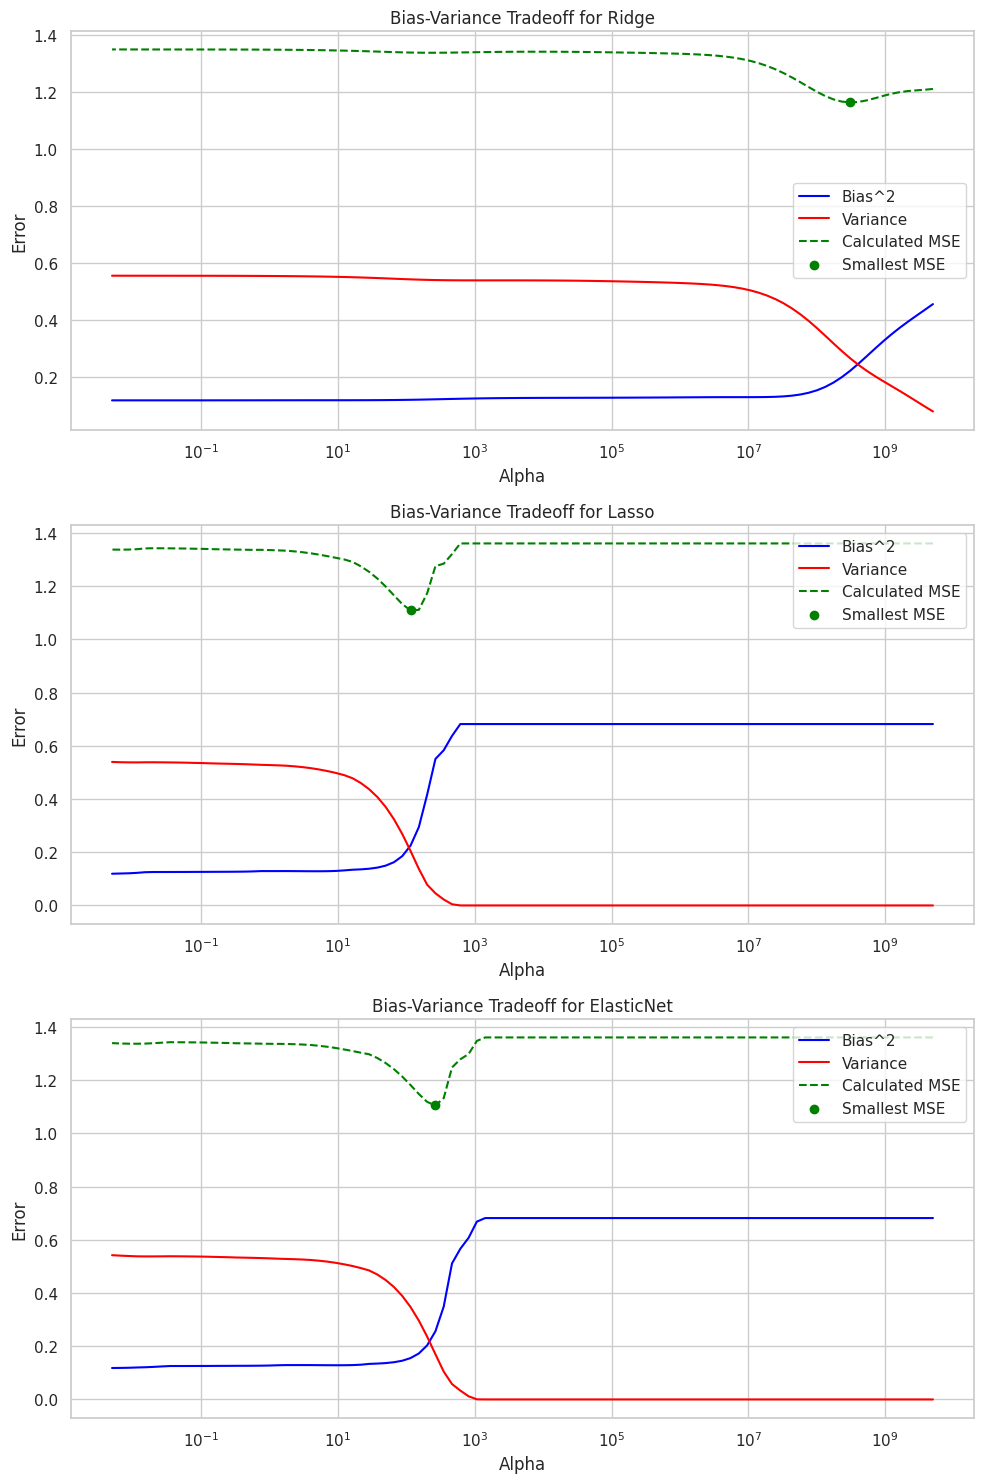

In [ ]:
# Calculate bias and variance for each model
bias_variance_results = []

for regression_model, name in zip([RidgeCV, LassoCV, ElasticNetCV], ['Ridge', 'Lasso', 'ElasticNet']):
    bias, variance, mse_calculated = calculate_bias_variance(regression_model, alphas, X_train, X_test, y_train, y_test)
    bias_variance_results.append((bias, variance, mse_calculated))  # Store results

# Plot bias-variance tradeoff
plot_bias_variance(alphas, bias_variance_results)

In all the above charts we consider MSE as the sum of:
bias^2 + variance + noise^2, as the basic MSE equation for bias-variance tradeoff, where we present bias as MAE^2

**For Ridge:**

- We can observe that only around alpha equal to 10^8 there is a decrease in variance at the expense of bias^2. The minimum MSE is obtained for alpha close to this value. But since we want to minimize the normal MSE (which in this case is simply bias^2), when we can find this minimum for alpa = 0.3289666123287841.

**For Lasso and ElasticNet:**

- In this case, the intersection of variance and bias^2 occurs much faster - already around alpha = 10^2.

- Since the Lasso and ElasticNet models are similar in output, the alpha minimizing bias^2 is also identical, equal to 0.05


In [ ]:
from typing import Union
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

def process_classification_model(
    classifier: Union[RidgeClassifier, LogisticRegression],
    X: pd.DataFrame,
    y: pd.Series,
    test_size: float = 0.2,
    random_state: int = 42,
    use_cv: bool = False,
    balanced: bool = True,
    **classifier_params
):
    """
    Fit a classification model (Ridge or Logistic Regression) and compute F1 and accuracy scores.
    Parameters:
    - classifier: the classifier model class (e.g., RidgeClassifier or LogisticRegression)
    - X: features DataFrame
    - y: target Series
    - test_size: proportion of the dataset to include in the test split
    - random_state: random seed for reproducibility
    - use_cv: boolean indicating whether to use cross-validation
    - balanced: indicates if the dataset is balanced (affects metrics used)
    - classifier_params: additional parameters for the classifier (e.g., regularization strength)
    """

    # Encode the target variable
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)

    # Create a pipeline with scaling and the specified classifier
    model_pipeline = make_pipeline(StandardScaler(), classifier(**classifier_params))

    # Fit the model
    model_pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = model_pipeline.predict(X_test)

    # Calculate metrics
    f1 = f1_score(y_test, y_pred, average='weighted')

    if balanced:
        accuracy = accuracy_score(y_test, y_pred)
        print(f"F1 Score: {f1:.5f}")
        print(f"Accuracy: {accuracy:.5f}")
    else:
        print(f"F1 Score: {f1:.5f}")

    # If using cross-validation, calculate mean F1 score across folds
    if use_cv:
        cv_scores = cross_val_score(model_pipeline, X, y_encoded, cv=5, scoring='f1_weighted')
        print(f"Cross-Validated F1 Score: {np.mean(cv_scores):.5f}")

# Preparing the datasets
# Assuming df_fs and df_ready_fs are your cleaned DataFrames
X = df_fs.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables
y = df_fs['Vegetation_Type']  # target variable

X_ready = df_ready_fs.drop(['Id', 'Vegetation_Type'], axis=1)  # independent variables for the ready dataset
y_ready = df_ready_fs['Vegetation_Type']  # target variable for the ready dataset

# Import the standard scaler
from sklearn.preprocessing import StandardScaler

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the input data
X_scaled_ready = scaler.fit_transform(X_ready)

# Example usage
best_alpha_ridge = 0.3289666123287841
best_alpha_lasso = 0.05
best_alpha_elasticnet = 0.05

# Process classification models for balanced dataset
print("Balanced Dataset:")
print("\nRidge Classifier:")
process_classification_model(RidgeClassifier, X_scaled, y, test_size=0.2, balanced=True, alpha=best_alpha_ridge)

print("\nLasso Classifier (Logistic Regression with L1 penalty):")
process_classification_model(LogisticRegression, X_scaled, y, test_size=0.2, balanced=True, penalty='l1', solver='saga', C=1/best_alpha_lasso, max_iter=1000)

print("\nElasticNet Classifier (Logistic Regression with ElasticNet penalty):")
process_classification_model(LogisticRegression, X_scaled, y, test_size=0.2, balanced=True, penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1/best_alpha_elasticnet, max_iter=1000)

# Process classification models for unbalanced dataset
print("\nUnbalanced Dataset:")
print("\nRidge Classifier:")
process_classification_model(RidgeClassifier, X_scaled_ready, y_ready, test_size=0.2, balanced=False, use_cv=True, alpha=best_alpha_ridge)

print("\nLasso Classifier (Logistic Regression with L1 penalty):")
process_classification_model(LogisticRegression, X_scaled_ready, y_ready, test_size=0.2, balanced=False, use_cv=True, penalty='l1', solver='saga', C=1/best_alpha_lasso, max_iter=1000)

print("\nElasticNet Classifier (Logistic Regression with ElasticNet penalty):")
process_classification_model(LogisticRegression, X_scaled_ready, y_ready, test_size=0.2, balanced=False, use_cv=True, penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1/best_alpha_elasticnet, max_iter=1000)


Balanced Dataset:

Ridge Classifier:
F1 Score: 0.81308
Accuracy: 0.81701

Lasso Classifier (Logistic Regression with L1 penalty):
F1 Score: 0.81305
Accuracy: 0.81593

ElasticNet Classifier (Logistic Regression with ElasticNet penalty):
F1 Score: 0.81305
Accuracy: 0.81593

Unbalanced Dataset:

Ridge Classifier:
F1 Score: 0.84387
Cross-Validated F1 Score: 0.84151

Lasso Classifier (Logistic Regression with L1 penalty):
F1 Score: 0.84248
Cross-Validated F1 Score: 0.83795

ElasticNet Classifier (Logistic Regression with ElasticNet penalty):
F1 Score: 0.84248
Cross-Validated F1 Score: 0.83795


------------------------------------------------------------

Now, comparing the results of all obtained F1-scores for the unbalanced dataset—specifically those obtained using CV(5,10) and classifiers—I get the following comparison:

------------------------------------------------------------



# Evaluation of Models

## Unbalanced Models

### Evaluating Unbalanced Model: LogReg
- Cross-Validation F1 Score (k=5): **0.830550**
- Cross-Validation F1 Score (k=10): **0.827579**
- LOOCV F1 Score: **0.830103**

### Evaluating Unbalanced Model: LDA
- Cross-Validation F1 Score (k=5): **0.820059**
- Cross-Validation F1 Score (k=10): **0.825027**
- LOOCV F1 Score: **0.831395**

### Evaluating Unbalanced Model: QDA
- Cross-Validation F1 Score (k=5): **0.634613**
- Cross-Validation F1 Score (k=10): **0.638442**
- LOOCV F1 Score: **0.708441**

### Evaluating Unbalanced Model: LogReg (with feature selection)
- Cross-Validation F1 Score (k=5): **0.829892**
- Cross-Validation F1 Score (k=10): **0.828317**
- LOOCV F1 Score: **0.831611**

### Evaluating Unbalanced Model: LDA (with feature selection)
- Cross-Validation F1 Score (k=5): **0.822781**
- Cross-Validation F1 Score (k=10): **0.826272**
- LOOCV F1 Score: **0.831611**

### Evaluating Unbalanced Model: QDA (with feature selection)
- Cross-Validation F1 Score (k=5): **0.663785**
- Cross-Validation F1 Score (k=10): **0.653999**
- LOOCV F1 Score: **0.723084**

### Evaluating Unbalanced Model: Ridge Classifier
- Cross-Validation F1 Score: **0.84279**

### Evaluating Unbalanced Model: Lasso Classifier
- Cross-Validation F1 Score: **0.83795**

### Evaluating Unbalanced Model: ElasticNet Classifier
- Cross-Validation F1 Score: **0.83795**

---

## Balanced Models

### Evaluating Balanced Model: LogReg
- Cross-Validation F1 Score (k=5): **0.837503**
- Cross-Validation Accuracy (k=5): **0.837778**
- Cross-Validation F1 Score (k=10): **0.839378**
- Cross-Validation Accuracy (k=10): **0.839683**
- LOOCV F1 Score: **0.838413**
- LOOCV Accuracy: **0.838413**

### Evaluating Balanced Model: LDA
- Cross-Validation F1 Score (k=5): **0.843491**
- Cross-Validation Accuracy (k=5): **0.843810**
- Cross-Validation F1 Score (k=10): **0.840291**
- Cross-Validation Accuracy (k=10): **0.840635**
- LOOCV F1 Score: **0.840317**
- LOOCV Accuracy: **0.840317**

### Evaluating Balanced Model: QDA
- Cross-Validation F1 Score (k=5): **0.662422**
- Cross-Validation Accuracy (k=5): **0.711111**
- Cross-Validation F1 Score (k=10): **0.632174**
- Cross-Validation Accuracy (k=10): **0.696825**
- LOOCV F1 Score: **0.685397**
- LOOCV Accuracy: **0.685397**

### Evaluating Balanced Model: LogReg (with feature selection)
- Cross-Validation F1 Score (k=5): **0.838777**
- Cross-Validation Accuracy (k=5): **0.839048**
- Cross-Validation F1 Score (k=10): **0.841281**
- Cross-Validation Accuracy (k=10): **0.841587**
- LOOCV F1 Score: **0.841587**
- LOOCV Accuracy: **0.841587**

### Evaluating Balanced Model: LDA (with feature selection)
- Cross-Validation F1 Score (k=5): **0.842224**
- Cross-Validation Accuracy (k=5): **0.842540**
- Cross-Validation F1 Score (k=10): **0.840618**
- Cross-Validation Accuracy (k=10): **0.840952**
- LOOCV F1 Score: **0.842222**
- LOOCV Accuracy: **0.842222**

### Evaluating Balanced Model: QDA (with feature selection)
- Cross-Validation F1 Score (k=5): **0.641249**
- Cross-Validation Accuracy (k=5): **0.692698**
- Cross-Validation F1 Score (k=10): **0.618076**
- Cross-Validation Accuracy (k=10): **0.680000**
- LOOCV F1 Score: **0.733016**
- LOOCV Accuracy: **0.733016**

### Evaluating Balanced Model: Ridge Classifier
- Cross-Validated Accuracy: **0.81701**

### Evaluating Balanced Model: Lasso Classifier
- Cross-Validated Accuracy: **0.81593**

### Evaluating Balanced Model: ElasticNet Classifier
- Cross-Validated Accuracy: **0.81593**


---------------------------------------------------
# Summarizing
---------------------------------------------------

## Data Exploration and Preprocessing

In the initial data exploration phase, we identified a significant class imbalance, prompting a strategy to test models on both **balanced** and **unbalanced data**. Key preprocessing steps included outlier detection, pattern analysis, and descriptive statistics to understand feature distributions.

---------------------------------------------------

## Model Selection and Validation Approach

We experimented with several validation methods—**holdout**, **cross-validation (CV)**, **leave-one-out cross-validation (LOOCV)**, and **bootstrap**—ultimately selecting **cross-validation (CV)** for its reliability and ability to facilitate direct comparisons among models. By using **CV**, we ensured that we could effectively compare models such as **LassoCV**, **RidgeCV**, and **ElasticNetCV** with other results, as all models evaluated used the same validation approach. This consistency provided robust performance insights, particularly with **balanced data**, and yielded low variance across folds.

It is important to note that we cannot use the holdout method or other validation techniques to compare models directly. The **holdout method** evaluates models on a single train-test split, which can lead to **variability** in results based on how the data is divided. As a result, it does not provide a comprehensive view of a model's performance across different subsets of the data.

**LOOCV**, while thorough in its approach, can be computationally expensive and may introduce **noise** in performance estimates due to the high variance associated with each fold containing only one sample for testing. This can make it challenging to achieve stable metrics necessary for comparison.

Similarly, the **bootstrap method** relies on sampling with replacement, which can introduce **bias** and lead to overfitting, making it less reliable for assessing model performance. The inherent variability in the bootstrapped samples may not accurately represent a model's performance on unseen data.

By contrast, using **cross-validation** ensures that every model is assessed on multiple data splits, allowing for more reliable comparisons and insights into generalizability. Therefore, to maintain comparability across models, CV was the optimal choice.

---------------------------------------------------

## Feature Selection and Data Transformation

We utilized two primary preprocessing techniques:

- ANOVA (Analysis of Variance)

  - ANOVA is a statistical method used to compare the means of numerical features across different categories of a categorical target variable. By assessing whether there are statistically significant differences between group means, ANOVA helps identify features that have a meaningful impact on the target variable. A low p-value (typically < 0.05) indicates that at least one group mean differs significantly from the others, suggesting a potential correlation with the target variable. Utilizing ANOVA in feature selection enhances model accuracy by retaining only those features that contribute valuable information, thereby reducing noise and improving interpretability.

- Chi-Squared Test

  - The Chi-Squared test evaluates the association between two categorical variables by analyzing the frequency of occurrences in each category to determine if they are independent. It generates a Chi-Squared statistic and a p-value, where a low p-value indicates a significant association between the categorical feature and the categorical target variable. This suggests that the feature contains relevant information that may improve predictive accuracy. By identifying categorical features that correlate with the target variable, the Chi-Squared test aids in selecting the most meaningful features, ultimately enhancing the model's robustness and generalization to unseen data.


Models were evaluated with and without feature selection to demonstrate performance improvements.

---------------------------------------------------

## Metrics Selection: F1 Score vs. Accuracy

For **unbalanced data**, we prioritized the **F1 Score** to emphasize precision and recall. Conversely, for **balanced data**, we focused on **accuracy** for a comprehensive view of model performance.

## Model Comparison and Final Selection

### Balanced LDA with Feature Selection

Balanced **LDA with feature selection** emerged as the best-performing model:

- **Best Metrics**:
  - Cross-Validation F1 Score (k=5): **0.842224**
  - Cross-Validation Accuracy (k=5): **0.842540**
  - Consistent scores across 5- and 10-folds CV, indicating stability.

While the **holdout method** showed a slightly higher F1 score for LDA (0.842318), the advantages of **cross-validation (CV)** include:

1. **Robustness and Reliability**: Evaluating across multiple data subsets provides a comprehensive understanding of performance.
2. **Generalization and Stability**: Consistent performance across folds indicates good generalization to unseen data.
3. **Reduced Risk of Overfitting**: CV mitigates the risk of overfitting by validating the model on different segments multiple times.

The stability across validation techniques signifies low risk of overfitting and reliable performance on unseen data, making it the most viable choice for deployment.

### Comparison to Other Models

- **Logistic Regression**: Shows competitive performance, particularly in bootstrap validation, but LDA offers more stability across LOOCV and CV methods.
  
- **Ridge, Lasso, and ElasticNet**: Demonstrated weaker performance with lower accuracy and F1 scores, making them less suitable for deployment.

- **Quadratic Discriminant Analysis (QDA)**: Although valuable for understanding non-linear boundaries, QDA showed inconsistent performance and lower metrics across the board, suggesting it is less suited for production settings.

### Why LDA with Feature Selection Stands Out

The balanced LDA model's strength lies in its high performance across all validation methods, enhanced by feature selection that improves interpretability and efficiency.

---------------------------------------------------

## Summary of Findings


### Balanced Data:
- **Balanced LDA with feature selection** stands out as the most suitable choice for deployment in real-world applications, especially those that require addressing class imbalance challenges. Its interpretability and efficiency further enhance its appeal. Future enhancements, such as hyperparameter tuning, ensemble techniques, and data augmentation, could further refine the model's performance. Overall, this model represents a strong foundation for effective predictive analytics.


### Unbalanced Data:
 - **Unbalanced Ridge Classifier** Unbalanced Ridge Classifier is the optimal choice for unbalanced data due to its robust performance, achieving the highest F1 Score (0.84279) and effectively balancing precision and recall, particularly for the minority class. Its incorporation of L2 regularization helps manage multicollinearity and reduces overfitting, allowing for better generalization to unseen data. Additionally, it adjusts the decision boundary favorably towards the minority class, enhancing sensitivity without sacrificing predictive accuracy for the majority class. The model's straightforward structure ensures simplicity and interpretability, facilitating clear understanding of feature relationships and predictions. Furthermore, it demonstrated consistent performance across various validation techniques, indicating reliability and resilience against the variability of unbalanced datasets. Collectively, these attributes make the Unbalanced Ridge Classifier an ideal solution for effectively addressing challenges presented by unbalanced data in real-world applications.


## Practical Implications and Potential Improvements

The balanced LDA model with feature selection is ideal for deployment in scenarios emphasizing class balance and interpretability. Future enhancements could include:

- **Tuning Hyperparameters**: Refining LDA's sensitivity to class boundaries, such as adjusting the regularization parameters to optimize the model’s performance.
- **Ensemble Techniques**: Combining LDA with other methods for a robust model.
- **Data Augmentation**: Increasing dataset diversity to improve models like QDA.
